# **Final Project Purwadhika Data Science: E-commerce Customer Churn Prediction**

**Introduction**

E-commerce companies face significant challenges in retaining customers and ensuring they continue using their services. Customer loss (*churn*) not only leads to revenue decline but also increases marketing costs to acquire new customers.  

**Retention cost** (the cost of keeping existing customers) is generally lower than **acquisition cost** (the cost of acquiring new customers), making an effective churn reduction strategy crucial for business sustainability.  

To address this challenge, companies rely on **Data Science** to:  
1. **Predict customers at risk of churning** so that preventive measures can be taken early.  
2. **Identify key factors that contribute to churn**, enabling companies to develop more effective retention strategies.  

By leveraging a data-driven approach, businesses can **optimize customer retention strategies** and **minimize the impact of churn on revenue**.  

---


**Problem Statement**  
How can we predict **whether a customer will churn**, so that:  
1. **The company can proactively retain high-value customers** before they discontinue using the service.  
2. **The company can increase overall business revenue** by reducing churn rates and improving customer loyalty.  

---

**Machine Learning Objective**  
Develop a **predictive model** to:  
1. **Reduce revenue loss due to churn** by identifying high-risk customers early.  
2. **Improve retention strategy effectiveness** based on predictable customer behavior patterns.  

---

**Analytic Approach**  
In this project, data exploration and analysis will be conducted to understand the patterns leading to customer churn. Then, several **supervised learning (classification)** models will be developed to:  
- Predict the probability of a customer churning or not.  
- Utilize **machine learning models** to identify the most influential factors in customer churn.  

---

**Value Proposition**  
Implementing a churn prediction model provides tangible business benefits in the form of:  

**1. Increased Revenue & Cost Efficiency**  
* **Prevents recurring revenue loss** by retaining high-value customers.  
* **Reduces marketing costs** by prioritizing customer retention over new customer acquisition.  

**2. Optimized Retention Strategies**  
* **Helps business and marketing teams develop targeted intervention strategies** for high-risk churn customers.  
* **Maximizes customer loyalty**, ensuring a more stable and sustainable customer base.  

---


**Metrics**

In the context of predicting customer churn in e-commerce, selecting the appropriate metrics is a crucial for evaluating model performance and making informed business decisions. The most insightful tools for this purpose is the confusion matrix, which provides a comprehensive breakdown of the model's predictions compared to the actual outcomes.


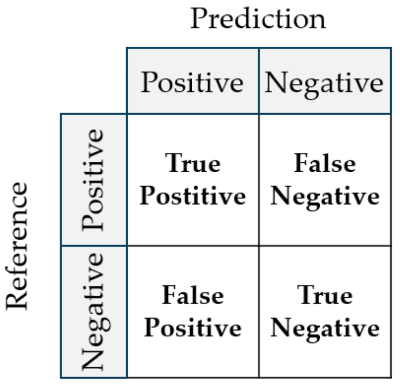

---

**Metric Evaluation**  
When evaluating the model, two key types of errors must be considered:  

**1️. False Negative (Type II Error)**  
- The model fails to identify customers who are actually going to churn.  
- **Impact:**  
  ( - ) **The company loses revenue** from customers who unsubscribe.  
  ( - ) **The company incurs acquisition costs** to gain new customers.  
- **Solution:**  (impact)
  - Focus on **improving recall**, ensuring the model is more sensitive in detecting churn-prone customers.  

**2️. False Positive (Type I Error)**  
- The model incorrectly classifies a non-churn customer as a churn risk.  
- **Impact:**  
  ( - ) The company **incurs unnecessary retention costs** for customers who were already loyal.  
  ( - ) May lead to bad user experience due to the wrong strategy.
- **Solution:**  
  - Maintain a balance between recall and precision  (F1 Score) to avoid overestimating churn.

  ---

F1 Score is the most suitable evaluation metric for churn prediction as it balances recall and precision, ensuring accurate detection of churners without significantly increasing retention costs. This approach helps businesses minimize revenue loss from undetected churn while avoiding unnecessary retention expenses, resulting in a more efficient and cost-effective data-driven strategy.  

By using this approach, the model provides **accurate and actionable predictions**, allowing the company to take strategic steps to **reduce churn and maximize profitability**.

## **1. Import Library**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.impute import KNNImputer

In [ ]:
df = pd.read_excel('./data/E Commerce Dataset.xlsx', sheet_name = 1)

In [ ]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
cat = []
num = []
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('categorical', cat)
print('numerical'  , num)

categorical ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
numerical ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [ ]:
df[cat].describe().T

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [ ]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


## **2. Data Cleaning Process**

Before proceeding with analysis, we need to clean the dataset to ensure data quality and consistency. This involves handling missing values, standardizing categorical data, and removing outliers. Additionally, we start by removing duplicate records to avoid redundant entries that could bias our results.

### Steps in Data Cleaning:
1. **Remove duplicate records** to ensure each row represents unique data points.
2. **Fill missing values** using appropriate statistical methods.
3. **Standardize data entries** that have different formats but the same meaning.
4. **Remove outlier data** to minimize distortions in analysis.

### 1. Remove duplicate records

In [ ]:
#check the length of data before deleting duplicates
len(df)

5630

In [ ]:
#Checked the number of duplicated data
df.drop(columns='CustomerID', inplace=True)
df.duplicated().sum()

556

In [ ]:
#remove the duplicated data
df.drop_duplicates(inplace=True)
dup = df.duplicated().sum()
print('There are', dup, 'duplicated data!')

There are 0 duplicated data!


In [ ]:
#check the length of data after deleting duplicates
len(df)

5074

### 2. Fill Missing Values

First, we identify which columns contain missing values. Then, we fill the missing values using a statistical approach.

In [ ]:
missing_column = [col for col in df.columns if df[col].isna().any()]
missing_column

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder']

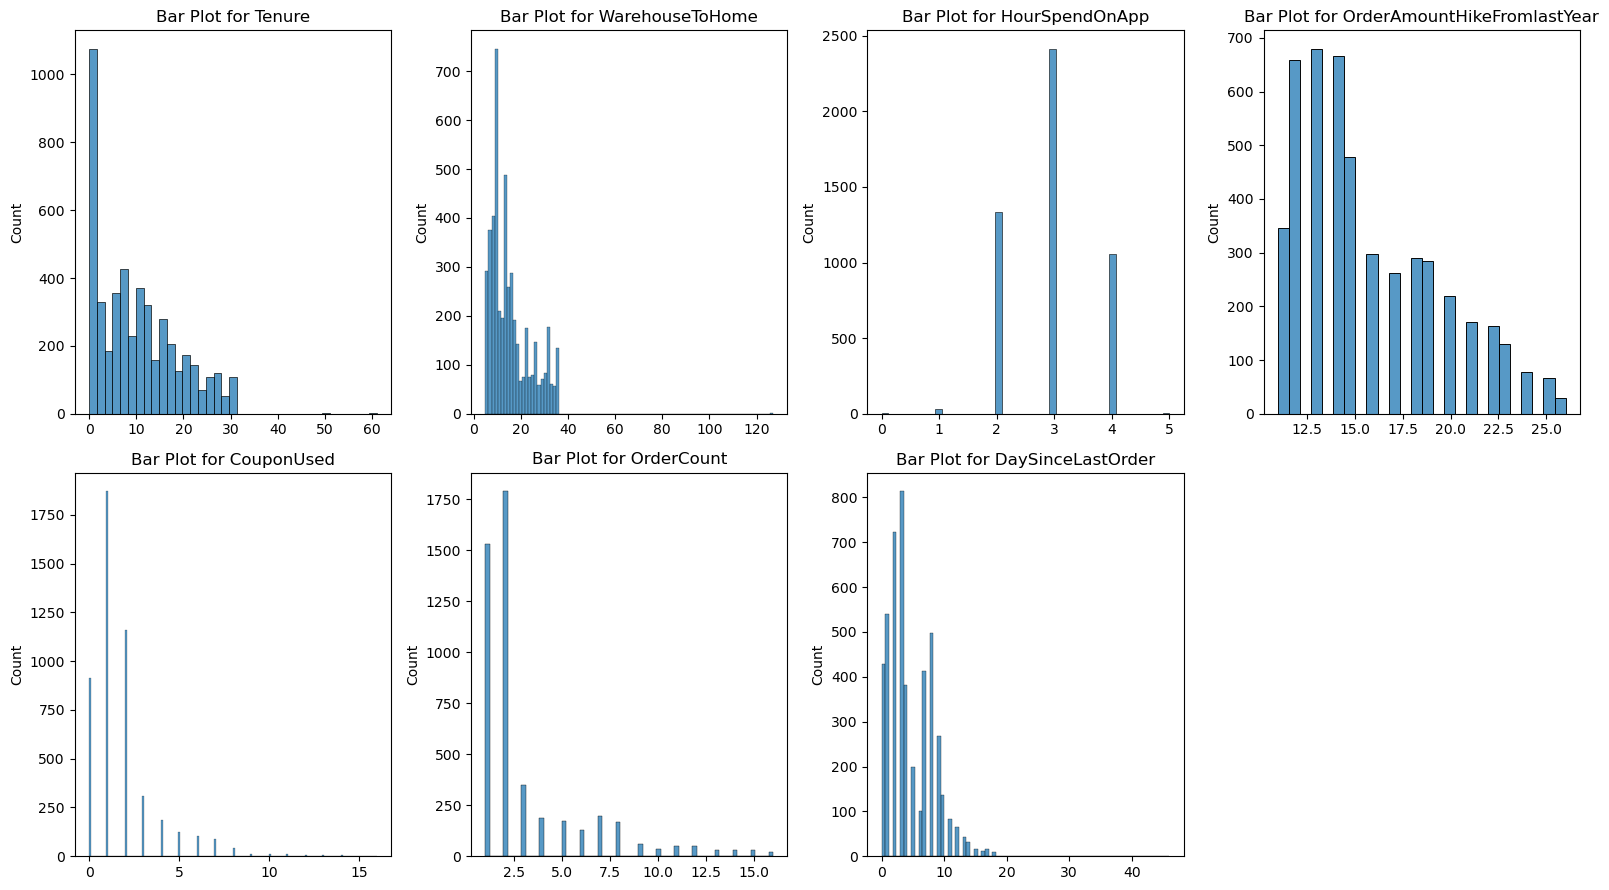

In [ ]:
fig, axes = plt.subplots(2,4, figsize=(16,9))
axes = axes.ravel()
for i, col in enumerate(missing_column):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Bar Plot for {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    #axes[i].tick_params(axis='x', rotation=45)

fig.delaxes(axes[7])
plt.tight_layout()
plt.show()

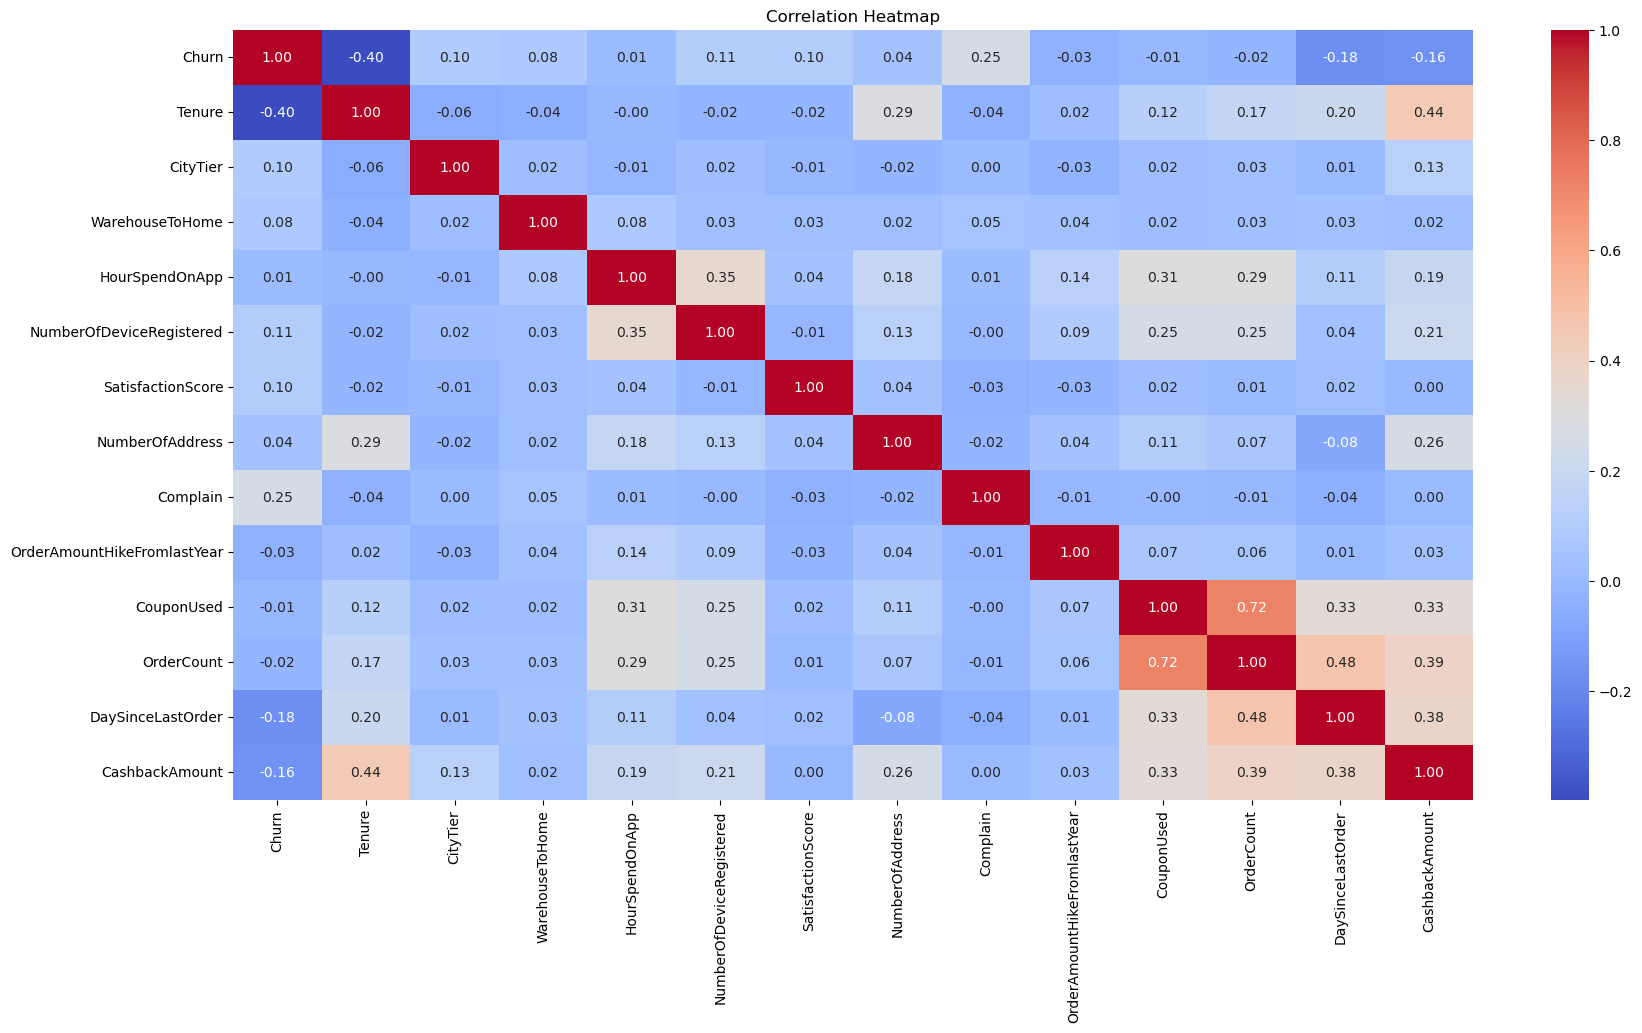

In [ ]:
corr_matrix = df.drop(columns=['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']).corr(method='spearman')

plt.figure(figsize=(20, 10))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

As seen in the previous results, seven columns contain missing values. We also presented histograms and bar charts for each column to analyze their data distribution. Additionally, we examined the correlation between numerical features to help determine the most suitable method for filling the missing values.

To further validate our imputation approach, we conduct a normality test on the numerical columns containing missing values using D'Agostino and Pearson’s normality test. This test evaluates whether the data follows a normal distribution by analyzing its skewness and kurtosis. A p-value below 0.05 indicates that the distribution is significantly different from normal. If a feature follows a normal distribution, using the mean for imputation is appropriate. However, if a feature is non-normally distributed (p-value < 0.05), using the median is a more robust choice, as it is less sensitive to extreme values.

In [ ]:
#If the pvalue < 0.05 (alpha) it means the data doesn't follow normal distribution, so we will use the median to fill the empty value instead of the mean.
alpha = 0.05
for col in missing_column:
  column = df[col].dropna()
  _, p_value = stats.normaltest(column)
  print(col)
  print(f"p_value\t: {p_value}")
  if p_value < alpha:
    print(f"Result\t:'{col}' doesn't follow normal distribution")
  else:
    print(f"Result\t:'{col}' follows normal distribution")
  print()

Tenure
p_value	: 8.373994667417594e-80
Result	:'Tenure' doesn't follow normal distribution

WarehouseToHome
p_value	: 0.0
Result	:'WarehouseToHome' doesn't follow normal distribution

HourSpendOnApp
p_value	: 6.469020963058282e-45
Result	:'HourSpendOnApp' doesn't follow normal distribution

OrderAmountHikeFromlastYear
p_value	: 1.1986806375355402e-91
Result	:'OrderAmountHikeFromlastYear' doesn't follow normal distribution

CouponUsed
p_value	: 0.0
Result	:'CouponUsed' doesn't follow normal distribution

OrderCount
p_value	: 0.0
Result	:'OrderCount' doesn't follow normal distribution

DaySinceLastOrder
p_value	: 6.411744359255958e-269
Result	:'DaySinceLastOrder' doesn't follow normal distribution



The results of the normality test confirm that all numerical columns containing missing values do not follow a normal distribution, as indicated by p-values below 0.05. This suggests that the data exhibits skewness or extreme values that could disproportionately affect the mean. Given this, using the median for imputation is the most appropriate choice for features that lack strong correlations with other variables, as it provides a more stable and representative central value without being influenced by outliers.


However, not all missing values are imputed using the median. For certain columns where a moderate or strong correlation (≥ 0.1) exists with other features, a more data-driven approach is applied by imputing missing values based on the most relevant correlated feature. This method helps retain meaningful relationships within the dataset while minimizing distortion. By leveraging median imputation, correlation-based imputation (KNNImputer), and median per category for features with a strong single-feature correlation, we ensure a balanced and contextually informed strategy that maintains the integrity of the data.

We start by filling the missing values in the 'WarehouseToHome', and 'OrderAmountHikeFromLastYear'. We fill missing values using the median of each column, as the correlation matrix indicates that these features do not have strong relationships with other variables (< 0.1). 'WarehouseToHome', which represents the distance between the warehouse and the customer's home, does not strongly correlate with other factors, making the median a neutral and stable choice that prevents skewing typical delivery distances. Similarly, 'OrderAmountHikeFromLastYear', which tracks the increase in order amount compared to the previous year, varies significantly due to individual customer behavior rather than clear patterns, so using the median ensures a representative central value without distortion from extreme cases. Overall, filling these gaps with the median is the safest way to keep the data clean while preserving natural trends.

In [ ]:
# Columns to impute
column_WOD = ['WarehouseToHome', 'OrderAmountHikeFromlastYear']
df[column_WOD] = df[column_WOD].transform(lambda x: x.fillna(x.median()))

#Checked the number of empty values after filling NaN values with median
for col in column_WOD:
    empty_val = df[col].isna().sum()
    print(f"There is {empty_val} empty values for {col} column")

There is 0 empty values for WarehouseToHome column
There is 0 empty values for OrderAmountHikeFromlastYear column


Next, for 'Tenure' and 'DaySinceLastOrder', we utilize KNN imputation, considering features that exhibit a correlation greater than 0.1 with them. This approach ensures that missing values are estimated based on the most relevant patterns within the dataset. 'Tenure', which represents the duration of a customer's relationship, is influenced by features such as 'NumberOfAddress', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', and 'CashbackAmount'. Similarly, 'DaySinceLastOrder' is imputed based on its relationship with 'CashbackAmount' and other transaction-related variables. Using KNN here helps maintain meaningful relationships in the dataset while making sure the missing values are filled in a logical way.

In [ ]:
#Imputer
imputer = KNNImputer(n_neighbors=5)

#KNN imputation for Tenure
tenure_col_imputes = ['Tenure', 'NumberOfAddress', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
tenure_imputer = df[tenure_col_imputes].copy()
imputed_data_tenure = imputer.fit_transform(tenure_imputer)
tenure_imputer = pd.DataFrame(imputed_data_tenure, columns=tenure_col_imputes, index=df.index)

#KNN imputation for DaySinceLastOrder
dslo_col_imputes = ['Tenure', 'HourSpendOnApp', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
dslo_imputer = df[dslo_col_imputes].copy()
imputed_data_dslo = imputer.fit_transform(dslo_imputer)
dslo_imputer = pd.DataFrame(imputed_data_dslo, columns=dslo_col_imputes, index=df.index)

#Move the imputation results to the original dataframe
df['Tenure'] = tenure_imputer['Tenure'].round().astype(int)
df['DaySinceLastOrder'] = dslo_imputer['DaySinceLastOrder'].round().astype(int)

#Checked the number of empty values after imputation (knn)
nan_tenure = df['Tenure'].isna().sum()
nan_dslo = df['DaySinceLastOrder'].isna().sum()

print(f"There is {nan_tenure} empty values for 'Tenure' column")
print(f"There is {nan_dslo} empty values for 'DaySinceLastOrder' column")

There is 0 empty values for 'Tenure' column
There is 0 empty values for 'DaySinceLastOrder' column


Next, we fill missing values in the 'HourSpendOnApp' column using 'NumberOfDeviceRegistered' since they have a moderate positive correlation (0.35). This makes sense because the number of registered devices is likely to impact the amount of time spent on the app, as users with multiple devices may engage more frequently. To maintain the natural distribution of the data and avoid potential distortions caused by outliers, we categorize 'NumberOfDeviceRegistered' and compute the median for each category to fill in missing values. This method ensures that missing values are imputed in a way that reflects typical user behavior.

In [ ]:
df.groupby('NumberOfDeviceRegistered')['HourSpendOnApp'].agg(['count','median'])

,count,median
NumberOfDeviceRegistered,,
1,189,2.0
2,250,3.0
3,1392,2.0
4,2080,3.0
5,787,3.0
6,146,3.0


Based on the distribution of 'HourSpendOnApp', we fill missing values using the median of each 'NumberOfDeviceRegistered' category.

In [ ]:
#Fill NaN with median
df['HourSpendOnApp'] = df.groupby('NumberOfDeviceRegistered')['HourSpendOnApp'].transform(lambda x: x.fillna(x.median()))

#Checked the number of empty values after filling NaN values with median
empty_hour = df['HourSpendOnApp'].isna().sum()
print(f"There is {empty_hour} empty values for 'HourSpendOnApp' column")

There is 0 empty values for 'HourSpendOnApp' column


Then, for 'OrderCount' and 'CouponUsed', we use each feature to fill in the missing values of the other, as they have a strong positive correlation (0.72). This makes sense since they are closely related typically, if 'OrderCount' is high, 'CouponUsed' will also be high, and vice versa.

In [ ]:
df.groupby('CouponUsed')['OrderCount'].agg(['count','median','mean'])

,count,median,mean
CouponUsed,,,
0.0,874,1.0,1.486270
1.0,1796,2.0,1.997216
2.0,1108,2.0,2.740072
3.0,284,4.0,5.024648
4.0,169,6.0,6.644970
5.0,116,7.0,7.353448
6.0,100,7.0,8.370000
7.0,80,8.0,8.750000
8.0,40,8.0,9.450000


In [ ]:
df.groupby('OrderCount')['CouponUsed'].agg(['count','median','mean'])

,count,median,mean
OrderCount,,,
1.0,1472,1.0,0.511549
2.0,1735,1.0,1.451297
3.0,343,2.0,1.944606
4.0,169,2.0,2.331361
5.0,166,3.0,2.765060
6.0,121,4.0,3.504132
7.0,188,4.0,3.973404
8.0,161,5.0,4.614907
9.0,55,5.0,5.000000


To maintain consistency, we fill the missing values in 'OrderCount' using the median of 'CouponUsed', and vice versa.

In [ ]:
# Fill NaN in OrderCount using the original CouponUsed
copy_ordercount = df['OrderCount'].copy()
df['CouponUsed'] = df['CouponUsed'].fillna(-1) # Temporarily replacing NaN with -1 allows groupby() to process all rows.
df['OrderCount'] = df.groupby('CouponUsed')['OrderCount'].transform(lambda x: x.fillna(x.median()))
df['CouponUsed'] = df['CouponUsed'].replace(-1, np.nan)

# Fill NaN in CouponUsed using the original OrderCount
copy_ordercount = copy_ordercount.fillna(-1)
df['CouponUsed'] = df.groupby(copy_ordercount)['CouponUsed'].transform(lambda x: x.fillna(x.median()))

#Checked the number of empty values after filling NaN values with median
empty_order = df['OrderCount'].isna().sum()
print(f"There is {empty_order} empty values for 'OrderCount' column")

empty_coupon = df['CouponUsed'].isna().sum()
print(f"There is {empty_coupon} empty values for 'CouponUsed' column")

There is 0 empty values for 'OrderCount' column
There is 0 empty values for 'CouponUsed' column


### 3. Standardizing Data Entries

In this step, we standardize data values that have different formats but the same meaning to ensure consistency. This is important because inconsistent labeling can affect data analysis and model performance.

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')


In [ ]:
for col in object_columns:
    print(f"{col}:\n\t {df[col].unique()}\n")

PreferredLoginDevice:
	 ['Mobile Phone' 'Phone' 'Computer']

PreferredPaymentMode:
	 ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender:
	 ['Female' 'Male']

PreferedOrderCat:
	 ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus:
	 ['Single' 'Divorced' 'Married']



#### 3.1. Standardizing 'PreferredLoginDevice' and 'PreferedOrderCat'

We replace occurrences of 'Phone' with 'Mobile Phone' in 'PreferredLoginDevice', and we replace 'Mobile' with 'Mobile Phone' in 'PreferedOrderCat'. This ensures a uniform naming convention across both columns.

In [ ]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

print(df['PreferredLoginDevice'].value_counts())
print('\n')
print(df['PreferedOrderCat'].value_counts())

PreferredLoginDevice
Mobile Phone    3617
Computer        1457
Name: count, dtype: int64


PreferedOrderCat
Mobile Phone          1856
Laptop & Accessory    1847
Fashion                763
Grocery                366
Others                 242
Name: count, dtype: int64


#### 3.2. Standardizing 'PreferredPaymentMode'

We also replace abbreviations in 'PreferredPaymentMode' for better readability:
* 'COD' → 'Cash on Delivery'
* 'CC' → 'Credit Card'

In [ ]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'COD': 'Cash on Delivery', 'CC': 'Credit Card'})

print(df['PreferredPaymentMode'].value_counts())

PreferredPaymentMode
Debit Card          2099
Credit Card         1596
E wallet             562
Cash on Delivery     457
UPI                  360
Name: count, dtype: int64


### 4. Remove outlier data

In [ ]:
numerical_column = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']

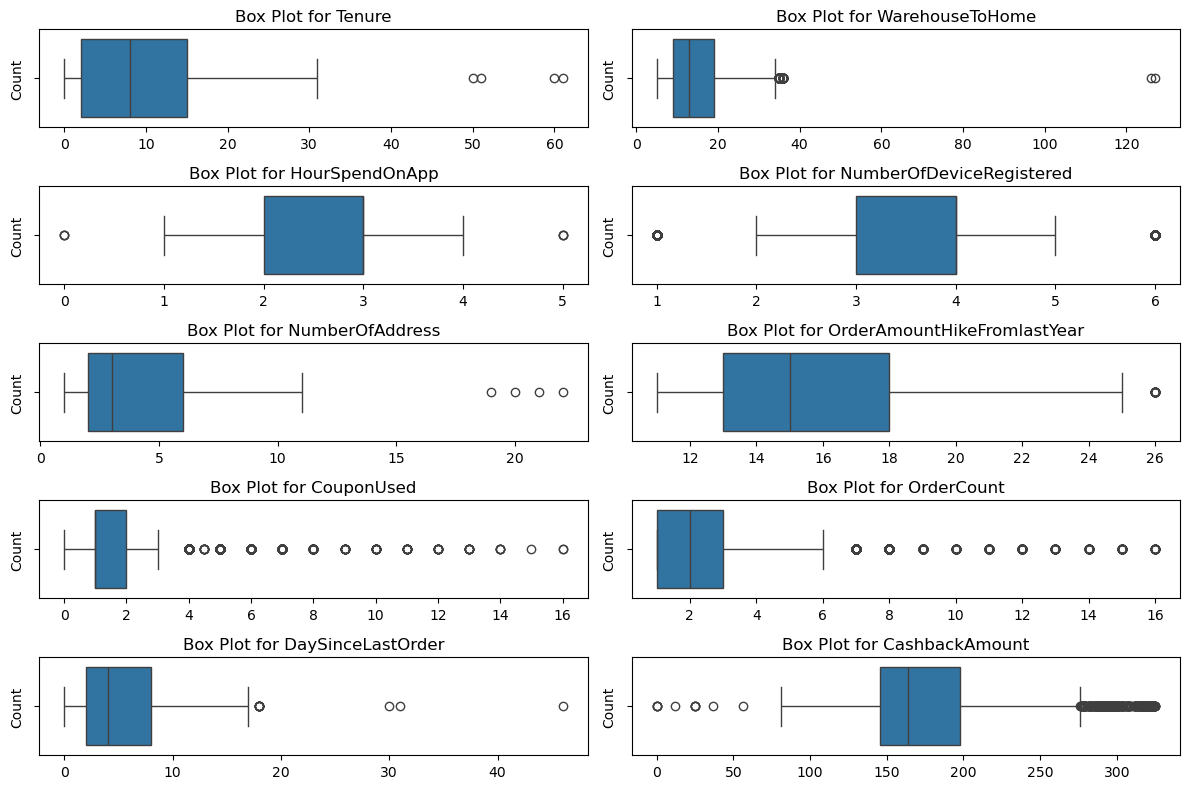

In [ ]:
fig, axes = plt.subplots(5,2, figsize=(12, 8))
axes = axes.ravel()
for i, col in enumerate(numerical_column):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Box Plot for {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    #axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

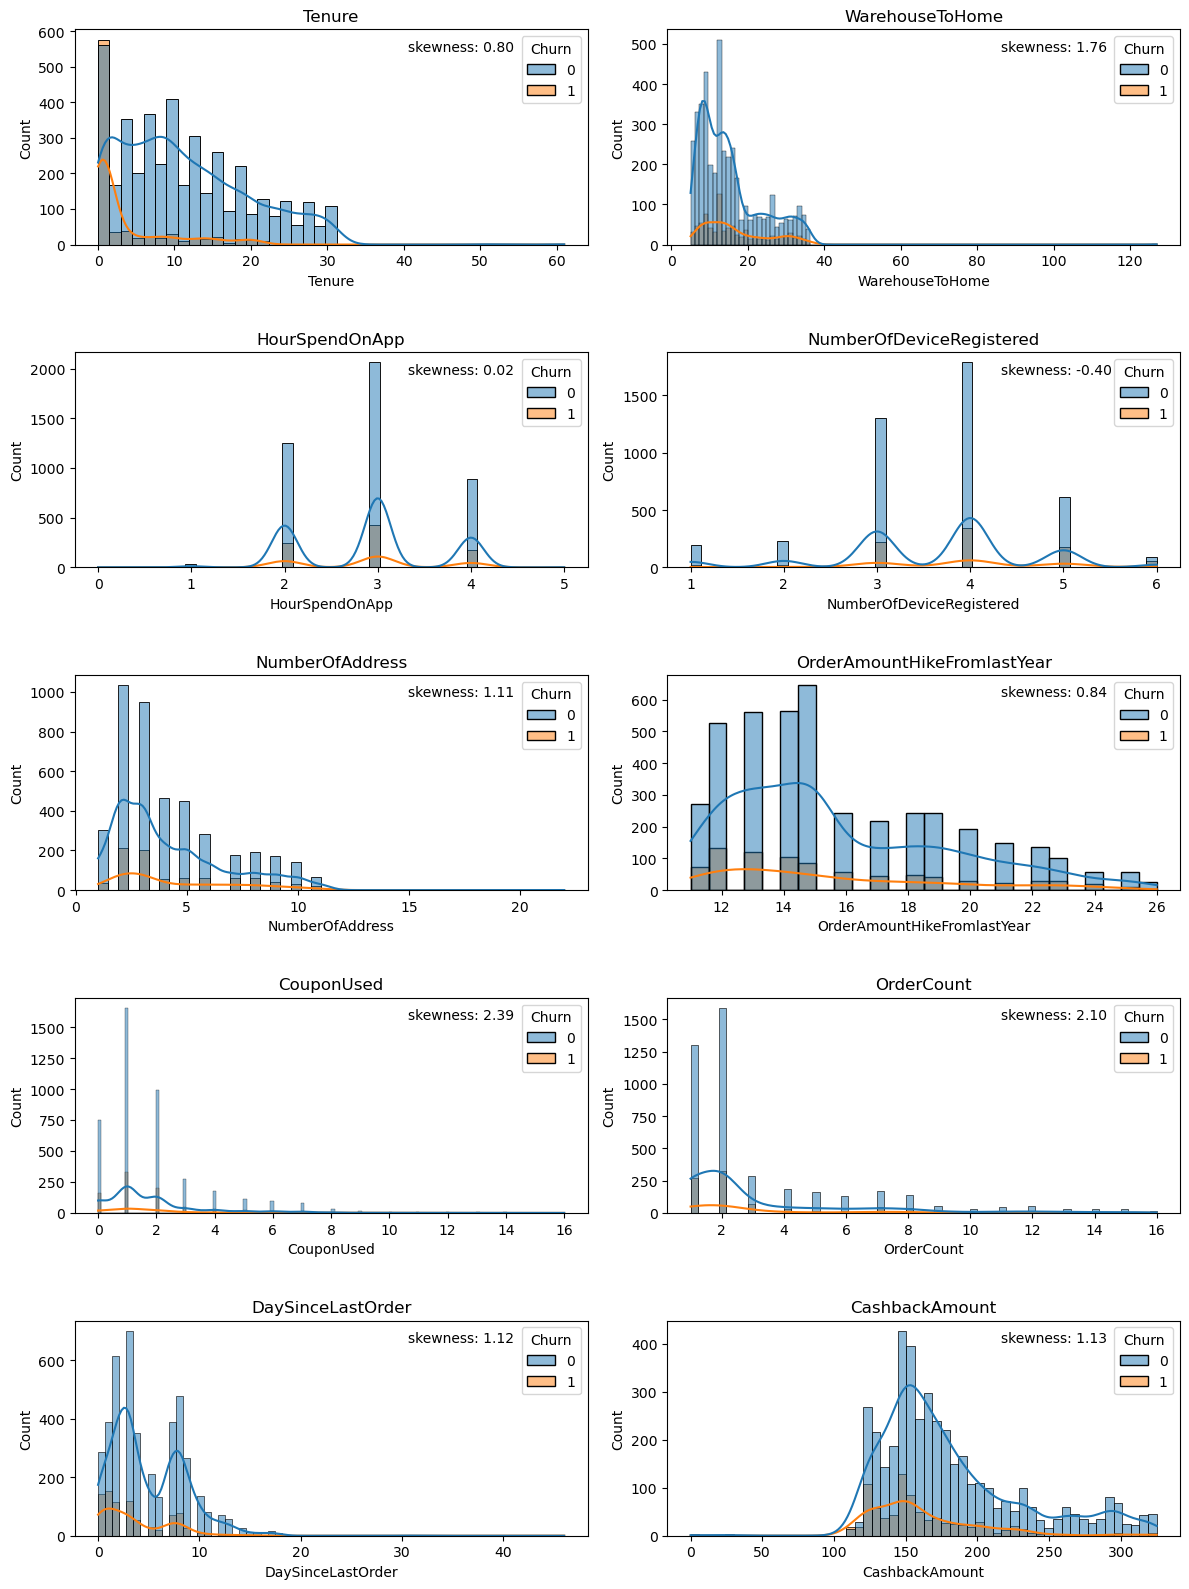

In [ ]:
import scipy.stats as skew

plt.figure(figsize=(12, 16))

for index, col in enumerate(df[numerical_column].columns, 1):
    plt.subplot(5, 2, index)
    skewness = stats.skew(df[col].dropna())
    sns.histplot(data=df, x=col, hue='Churn', kde=True, label=f'skewness: {skewness:.2f}', )

    plt.title(col)
    plt.text(0.65, 0.90,  f'skewness: {skewness:.2f}', transform=plt.gca().transAxes,fontsize=10)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Atur jarak antar subplot
plt.show()

In [ ]:
def outlier_analysis(data_):
    Q1 = data_.quantile(0.25)
    Q3 = data_.quantile(0.75)
    IQR= Q3-Q1

    lb = Q1-2*IQR
    ub = Q3+2*IQR

    return lb,ub

In [ ]:
num_outlier = [df[(df[columns] < outlier_analysis(df[columns])[0]) | (df[columns] > outlier_analysis(df[columns])[1])].shape[0] for columns in numerical_column]
pd.DataFrame([num_outlier], columns=numerical_column, index=['Number of Outlier'])

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Number of Outlier,4,2,0,0,4,0,465,495,3,147


We remove outliers only from `WarehouseToHome` and drop `NumberOfAddress` to simplify the dataset. `WarehouseToHome` has just 2 outliers, making its removal minimal and non disruptive. `NumberOfAddress` is removed due to its highly skewed distribution, where extreme values contribute little analytical value. `Tenure` is retained as it provides insights into long-term customer behavior, where high values may indicate loyal customers rather than anomalies. `HourSpendOnApp` and `NumberOfDeviceRegistered` are treated as categorical-like features, where extreme values may represent distinct customer usage patterns rather than actual outliers. `OrderAmountHikeFromLastYear` is kept since large order increases may highlight high value customers. `OrderCount` (495 outliers) and `CouponUsed` (465 outliers) have a high number of outliers, and removing them would risk losing valuable information. Lastly, `DaySinceLastOrder` captures purchase recency, where long gaps may indicate dormant or returning users, making it important to retain outliers for customer segmentation.

In [ ]:
remove_outlierscolumn = ['WarehouseToHome', 'NumberOfAddress']
for col in remove_outlierscolumn:
    lb,ub = outlier_analysis(df[col])
    df = df[(df[col]>=lb)&(df[col]<=ub)]

#### Reason to keep CouponUsed and OrderCount

<Axes: xlabel='CouponUsed', ylabel='OrderCount'>

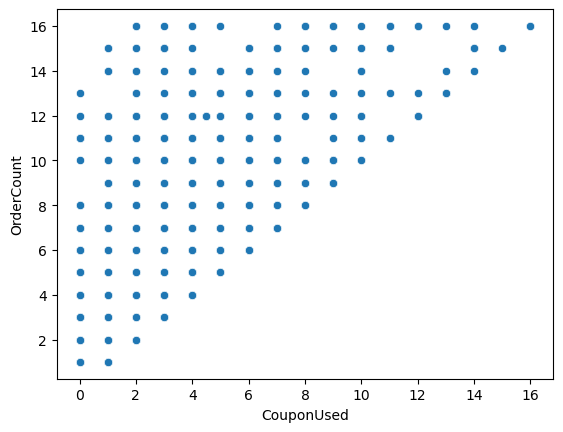

In [ ]:
sns.scatterplot(data=df, x='CouponUsed', y='OrderCount')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,5068.0,0.165549,0.371712,0.0,0.000,0.00,0.00,1.00
Tenure,5068.0,9.910024,8.526801,0.0,2.000,8.00,15.00,61.00
CityTier,5068.0,1.658445,0.919255,1.0,1.000,1.00,3.00,3.00
WarehouseToHome,5068.0,15.393449,8.135951,5.0,9.000,13.00,19.00,36.00
HourSpendOnApp,5068.0,2.901342,0.725453,0.0,2.000,3.00,3.00,5.00
NumberOfDeviceRegistered,5068.0,3.686464,1.030116,1.0,3.000,4.00,4.00,6.00
SatisfactionScore,5068.0,3.028808,1.384440,1.0,2.000,3.00,4.00,5.00
NumberOfAddress,5068.0,4.181926,2.539068,1.0,2.000,3.00,6.00,11.00
Complain,5068.0,0.282557,0.450287,0.0,0.000,0.00,1.00,1.00
OrderAmountHikeFromlastYear,5068.0,15.675612,3.591119,11.0,13.000,15.00,18.00,26.00


There are no anomalies in the CouponUsed and OrderCount data, as the number of coupons used does not exceed the number of orders. The data is right-skewed, with most customers having low orders and coupon usage, while a few have high values and are considered outliers based on IQR. The large number of outliers reflects customer variation with different shopping habits.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5068 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5068 non-null   int64  
 1   Tenure                       5068 non-null   int32  
 2   PreferredLoginDevice         5068 non-null   object 
 3   CityTier                     5068 non-null   int64  
 4   WarehouseToHome              5068 non-null   float64
 5   PreferredPaymentMode         5068 non-null   object 
 6   Gender                       5068 non-null   object 
 7   HourSpendOnApp               5068 non-null   float64
 8   NumberOfDeviceRegistered     5068 non-null   int64  
 9   PreferedOrderCat             5068 non-null   object 
 10  SatisfactionScore            5068 non-null   int64  
 11  MaritalStatus                5068 non-null   object 
 12  NumberOfAddress              5068 non-null   int64  
 13  Complain               

In [ ]:
df.to_excel('clean_data.xlsx')

## VIF

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Example: Assuming df contains only numerical independent variables
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Example usage
# df_numeric should contain only numerical predictor variables (drop target & categorical features if needed)
df_numeric = df.select_dtypes(include=[np.number])  
vif_result = calculate_vif(df_numeric)
print(vif_result)


                        Feature        VIF
0                         Churn   1.568389
1                        Tenure   3.706243
2                      CityTier   4.134467
3               WarehouseToHome   4.489950
4                HourSpendOnApp  18.805292
5      NumberOfDeviceRegistered  15.133308
6             SatisfactionScore   5.415628
7               NumberOfAddress   4.275656
8                      Complain   1.502455
9   OrderAmountHikeFromlastYear  14.509416
10                   CouponUsed   4.620580
11                   OrderCount   5.751891
12            DaySinceLastOrder   3.841270
13               CashbackAmount  19.874419


In [ ]:
df1 = df.copy()
df1 = df1.drop(columns='Churn')
df1_numeric = df1.select_dtypes(include=[np.number])  
vif1_result = calculate_vif(df1_numeric)
print(vif1_result)

                        Feature        VIF
0                        Tenure   3.309071
1                      CityTier   4.101452
2               WarehouseToHome   4.472147
3                HourSpendOnApp  18.743479
4      NumberOfDeviceRegistered  14.923609
5             SatisfactionScore   5.340505
6               NumberOfAddress   4.186629
7                      Complain   1.394915
8   OrderAmountHikeFromlastYear  14.493958
9                    CouponUsed   4.620564
10                   OrderCount   5.728750
11            DaySinceLastOrder   3.805741
12               CashbackAmount  19.874408


In [ ]:
df2 = df.copy()
df2 = df2.drop(columns=['Churn','CashbackAmount', 'HourSpendOnApp', 'NumberOfDeviceRegistered'])
df2_numeric = df2.select_dtypes(include=[np.number])  
vif2_result = calculate_vif(df2_numeric)
print(vif2_result)

                       Feature       VIF
0                       Tenure  2.633647
1                     CityTier  3.843721
2              WarehouseToHome  4.291234
3            SatisfactionScore  5.052868
4              NumberOfAddress  3.831453
5                     Complain  1.381329
6  OrderAmountHikeFromlastYear  9.596683
7                   CouponUsed  4.554995
8                   OrderCount  5.658889
9            DaySinceLastOrder  3.509491


In [ ]:
df.groupby('Churn')['Tenure'].mean()

Churn
0    11.200047
1     3.407628
Name: Tenure, dtype: float64

## **3. Exploratory Data Analysis (EDA)**

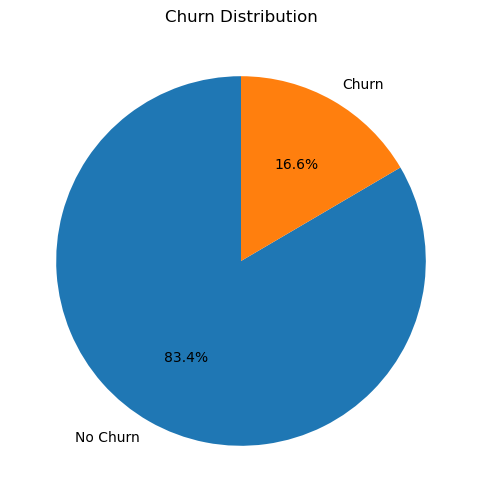

In [ ]:
#Churn Distribution
churn_pie = df['Churn'].value_counts()
labels = ['No Churn', 'Churn']

plt.figure(figsize=(6,6))
plt.pie(churn_pie, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.show()

In [ ]:
df['Churn'].value_counts()

Churn
0    4229
1     839
Name: count, dtype: int64

Before analyzing other features, it is essential to understand the distribution of the target variable, which is Churn. The dataset is imbalanced, with 839 customers having churned, representing 16.6% of the total, while 4229 customers did not churn, making up 83.4 %. Since the churned customers are a minority, careful consideration must be given during analysis. Techniques such as oversampling and undersampling may be necessary to balance the data before training machine learning models.

Next, we will analyze the distribution of all features that are of type float and integer, excluding binary features such as 'Gender' and 'Complain'.

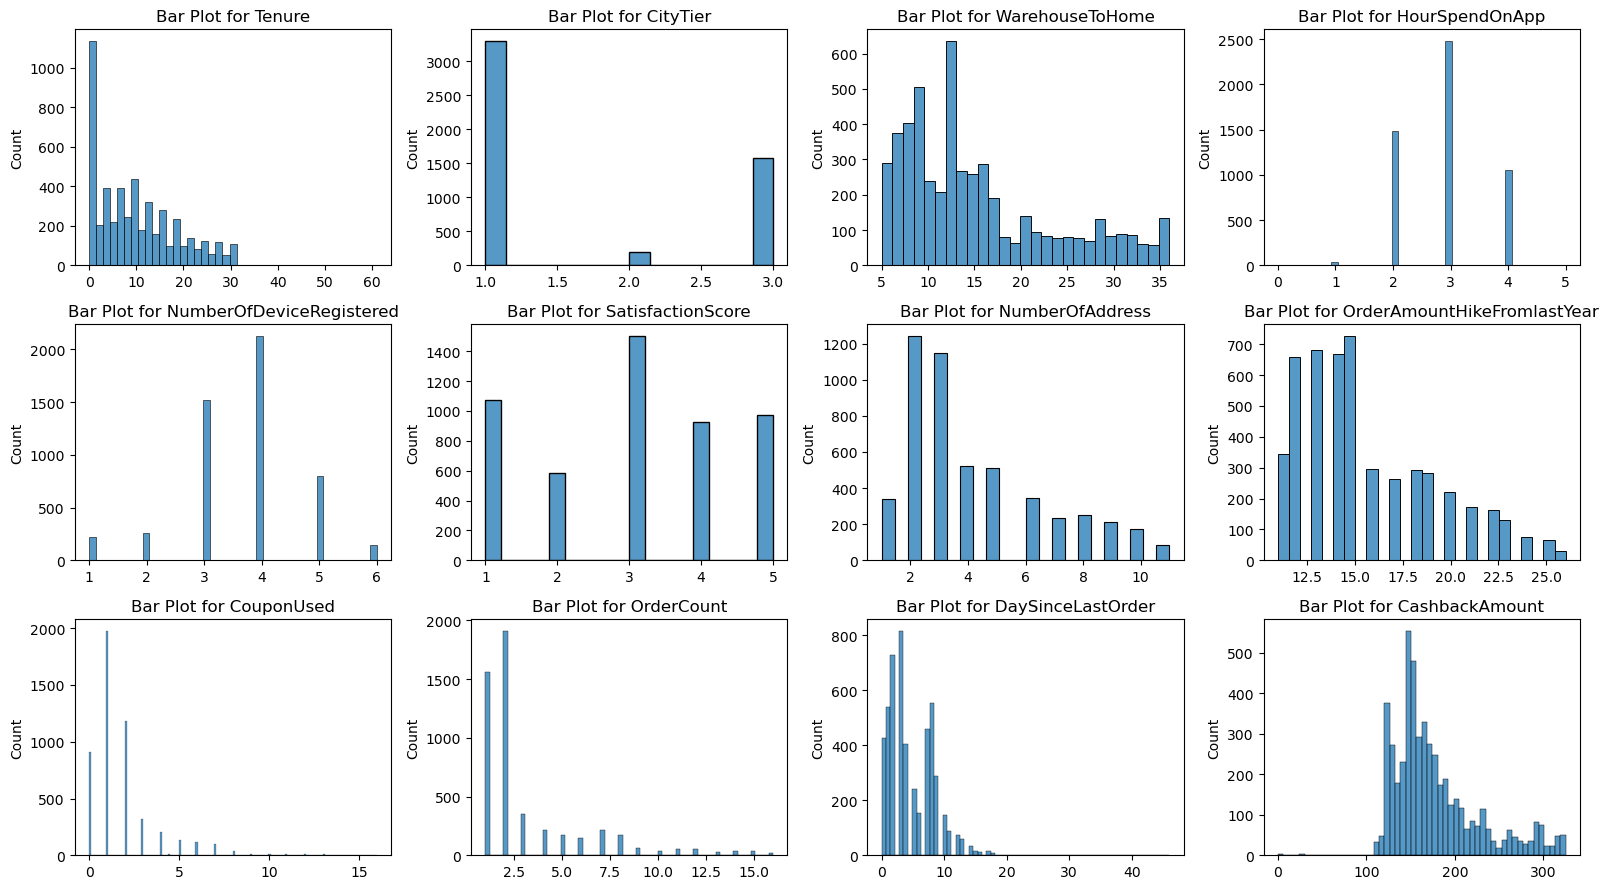

In [ ]:
numerical_columns = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                    'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed',
                    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

fig, axes = plt.subplots(3,4, figsize=(16,9))

axes = axes.ravel()

for i, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Bar Plot for {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    #axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

From the distribution of each feature, it can be observed that 'CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', and 'SatisfactionScore' have a relatively small number of categories (≤6). Therefore, further analysis will be conducted to determine whether these features should be classified as ordinal or treated as regular categorical variables.

In [ ]:
ordinal_candidates = ['CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore']

# Spearman Correlation
print("Spearman Correlation Test:\n")
for col in ordinal_candidates:
    spearman_corr, p_value = stats.spearmanr(df[col], df['Churn'])
    print(col)
    print(f"Spearman correlation \t= {spearman_corr:.4f}")
    print(f"p-value \t\t= {p_value:.4f}\n")

Spearman Correlation Test:

CityTier
Spearman correlation 	= 0.0987
p-value 		= 0.0000

HourSpendOnApp
Spearman correlation 	= 0.0065
p-value 		= 0.6420

NumberOfDeviceRegistered
Spearman correlation 	= 0.1103
p-value 		= 0.0000

SatisfactionScore
Spearman correlation 	= 0.1009
p-value 		= 0.0000



Although the Spearman correlation for CityTier and SatisfactionScore is weak (~0.1), the low p-value (p < 0.05) confirms their statistical significance. Both have a logical ordinal structure, making ordinal encoding more appropriate than one-hot encoding. CityTier, categorized from 1 to 3, reflects city classification, where higher tiers may indicate better service accessibility. SatisfactionScore, ranging from 1 to 5, represents customer satisfaction, which influences churn. Despite the weak correlation, their ranking structure justifies ordinal encoding.

Conversely, NumberOfDeviceRegistered, while statistically significant, lacks a clear ordinal pattern. Most customers have three or four devices, with fewer having one or six. No consistent trend links higher device counts to churn, so this feature is better treated as a discrete numerical variable.

Similarly, HourSpendOnApp shows no ordinal characteristics, with a negligible Spearman correlation (0.0065) and a high p-value (0.6420), indicating no meaningful relationship with churn. Given this, it is best considered a discrete numerical variable.

**Next**, we need to determine whether the numerical features that were not classified as ordinal require normalization. Since we have already tested the normality of 'Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, and DaySinceLastOrder, we will now test the remaining numerical features. To decide whether normalization is necessary, we will first check whether these features follow a normal distribution. If they are normally distributed, we may consider standardization (Z-score normalization). If they are not normally distributed, we may apply Min-Max scaling or other transformations to ensure they are appropriately scaled for modeling.

In [ ]:
#If the pvalue < 0.05 (alpha) it means the data doesn't follow normal distribution, so we will use the median to fill the empty value instead of the mean.
alpha = 0.05
for col in ['NumberOfDeviceRegistered', 'NumberOfAddress', 'CashbackAmount']:
  column = df[col].dropna()
  _, p_value = stats.normaltest(column)
  print(col)
  print(f"p_value\t: {p_value}")
  if p_value < alpha:
    print(f"Result\t:'{col}' doesn't follow normal distribution")
  else:
    print(f"Result\t:'{col}' follows normal distribution")
  print()


NumberOfDeviceRegistered
p_value	: 1.3126866986825681e-37
Result	:'NumberOfDeviceRegistered' doesn't follow normal distribution

NumberOfAddress
p_value	: 1.6937513354070803e-124
Result	:'NumberOfAddress' doesn't follow normal distribution

CashbackAmount
p_value	: 1.8287621417793447e-177
Result	:'CashbackAmount' doesn't follow normal distribution



The results of the normality test indicate that none of numerical features follow a normal distribution.

Next, we will visualize the pattern of `Tenure` based on the categories of churn and non-churn, given that this feature has the highest correlation with the target variable (-0.40).

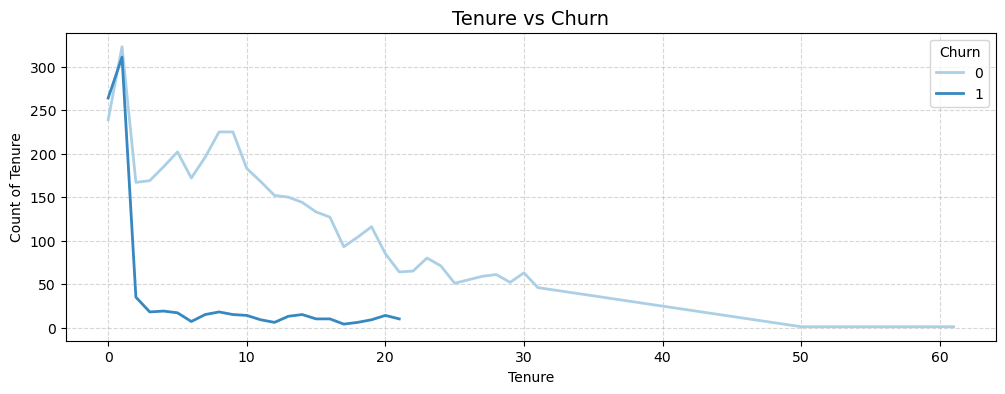

In [ ]:
df_grouped = df.groupby(['Tenure', 'Churn']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(12, 4))

sns.lineplot(data=df_grouped, x='Tenure', y='Count', hue='Churn',palette='Blues', linewidth=2)

plt.title("Tenure vs Churn", fontsize=14)
plt.xlabel("Tenure")
plt.ylabel("Count of Tenure")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [ ]:
df_tenure_less1 = df[df['Tenure']<=1]
pd.crosstab(df_tenure_less1['Tenure'], df_tenure_less1['Churn'])

Churn,0,1
Tenure,,
0,239,264
1,323,311


More than 300 customers churned after first purchase, with **264 customers** leaving with 0 month of tenure and another **311 customers** churning after the first month. This indicates that early-stage retention is a critical challenge, as nearly half of the churned customers leave within the first two months.

After the first month, the churn rate drops significantly and remains low in the following periods. This suggests that customers who stay beyond the initial months are more likely to continue using the platform.

Additionally, after reaching a **tenure of more than 21 months**, the total number of customers declines, but the churn rate also decreases. This indicates that long-term customers are highly unlikely to churn, reinforcing the idea that once a customer stays engaged beyond a certain period, they tend to remain loyal.

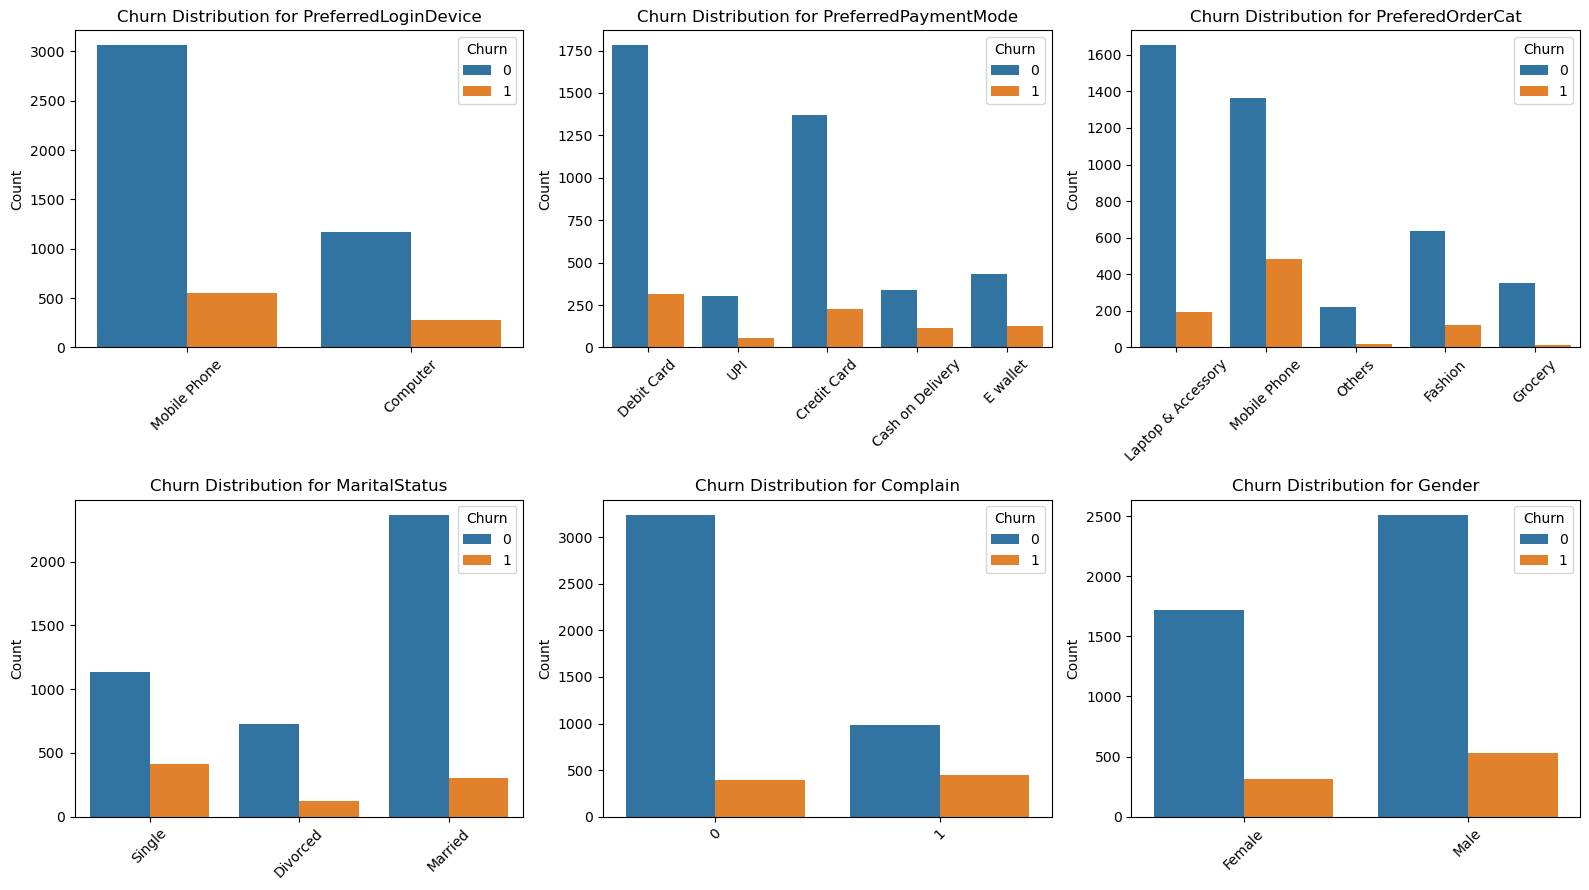

In [ ]:
categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus', 'Complain', 'Gender']

fig, axes = plt.subplots(2, 3, figsize=(16, 9))
axes = axes.ravel()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue="Churn", ax=axes[i])
    axes[i].set_title(f"Churn Distribution for {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

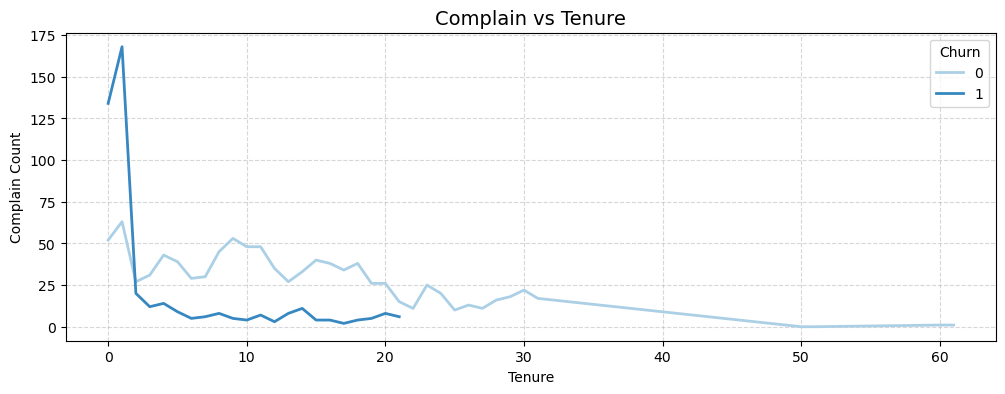

In [ ]:
df_grouped = df.groupby(['Tenure', 'Churn'])['Complain'].sum().reset_index()

plt.figure(figsize=(12, 4))

sns.lineplot(data=df_grouped, x='Tenure', y='Complain', hue='Churn', palette='Blues', linewidth=2)

plt.title("Complain vs Tenure", fontsize=14)
plt.xlabel("Tenure")
plt.ylabel("Complain Count")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


- Complaints peak sharply in the first month, with a significant drop afterward. This suggest that many customer experience issues immediately after onboarding

- Customers who churn (Churn = 1) file more complaints early on compared to those who stay (Churn = 0), but their complaint count declines quickly.

- While complaints continue at a moderate level in mid-tenure (5-20 months), they do not immediately lead to churn. This shows that the customer are dissatisfied but decided to tolerate the issue for a while before taking a decision.

- Customers with more than 20 month of tenure rarely file a complaints, indicating that long-term customers are generally more satisfied or have adapted to the service.

Lets breakdown the churn distribution. What type of customer that churns in this store.

In [ ]:
print("Silent Churner (0 Complaints, Satisfaction ≥ 3):",
      df[(df['Churn'] == 1) & (df['Complain'] == 0) & (df['SatisfactionScore'] >= 3)].shape[0])

print("Churner with Complaints (1 Complaint, Satisfaction ≥ 3):",
      df[(df['Churn'] == 1) & (df['Complain'] == 1) & (df['SatisfactionScore'] >= 3)].shape[0])

print("Dissatisfied Churner with Complaints (1 Complaint, Satisfaction < 3):",
      df[(df['Churn'] == 1) & (df['Complain'] == 1) & (df['SatisfactionScore'] < 3)].shape[0])

print("Dissatisfied Silent Churner (0 Complaints, Satisfaction < 3):",
      df[(df['Churn'] == 1) & (df['Complain'] == 0) & (df['SatisfactionScore'] < 3)].shape[0])

print("Total Churned Customers:", df[df['Churn'] == 1].shape[0])


Silent Churner (0 Complaints, Satisfaction ≥ 3): 310
Churner with Complaints (1 Complaint, Satisfaction ≥ 3): 333
Dissatisfied Churner with Complaints (1 Complaint, Satisfaction < 3): 114
Dissatisfied Silent Churner (0 Complaints, Satisfaction < 3): 82
Total Churned Customers: 839


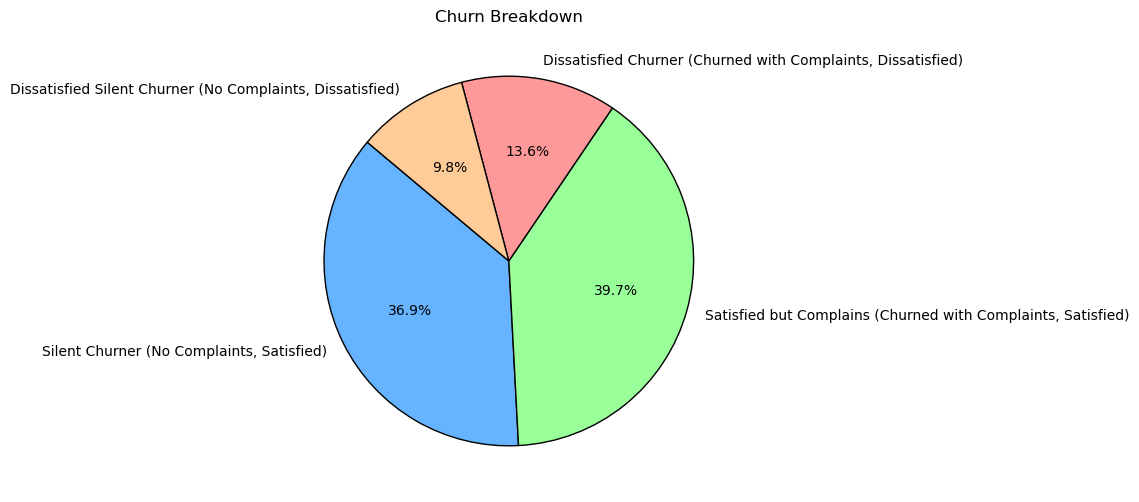

In [ ]:
labels = [
    'Silent Churner (No Complaints, Satisfied)',
    'Satisfied but Complains (Churned with Complaints, Satisfied)',
    'Dissatisfied Churner (Churned with Complaints, Dissatisfied)',
    'Dissatisfied Silent Churner (No Complaints, Dissatisfied)'
]
sizes = [310, 333, 114, 82]
colors = ['#66b3ff', '#99ff99', '#ff9999', '#ffcc99']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Churn Breakdown')
plt.show()

* Silent Churners (No complaints, high satisfaction) → These customers appear satisfied but still decide to leave. Their churn may be driven by factors not captured in complaints, such as better deals elsewhere or changing needs.

* Satisfied but Complains → Despite filing complaints, these customers still rate their satisfaction as high. Their churn might be due to unresolved issues, frustration with service processes, or convenience factors.

* Dissatisfied Churners (with Complaints) → The most at-risk group. They had clear issues, voiced their concerns, and still ended up leaving. This signals major gaps in customer support or issue resolution.

* Dissatisfied Silent Churners → These customers never complained but were still dissatisfied and left quietly. They could be passive churners who didn't find it worth the effort to raise issues before switching to a competitor.

In [ ]:
numerical_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
for col in numerical_columns:
    mean_values = df.groupby('Churn')[col].mean()

    print(f"Mean {col}:")
    for churn_status, mean_value in mean_values.items():
        print(f"  Churn {churn_status}: {mean_value:.4f}")
    print()


Mean Tenure:
  Churn 0: 11.2000
  Churn 1: 3.4076

Mean WarehouseToHome:
  Churn 0: 15.1405
  Churn 1: 16.6687

Mean HourSpendOnApp:
  Churn 0: 2.8986
  Churn 1: 2.9154

Mean NumberOfDeviceRegistered:
  Churn 0: 3.6328
  Churn 1: 3.9571

Mean NumberOfAddress:
  Churn 0: 4.1267
  Churn 1: 4.4601

Mean OrderAmountHikeFromlastYear:
  Churn 0: 15.7101
  Churn 1: 15.5018

Mean CouponUsed:
  Churn 0: 1.8389
  Churn 1: 1.8069

Mean OrderCount:
  Churn 0: 3.1310
  Churn 1: 2.9857

Mean DaySinceLastOrder:
  Churn 0: 4.9579
  Churn 1: 3.5936

Mean CashbackAmount:
  Churn 0: 180.8070
  Churn 1: 161.8399



In [ ]:
numerical_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                     'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
alpha = 0.05
for col in numerical_columns:
    churn_0 = df[df['Churn']==0][col]
    churn_1 = df[df['Churn']==1][col]
    u_stat, p_value = stats.mannwhitneyu(churn_0, churn_1, alternative='two-sided')

    print(f"{col}\n p_value: {p_value}")
    if p_value<alpha:
        print(f"There is a significant relationship between {col} and Churn.\n")
    else:
        print(f"There is NO significant relationship between {col} and Churn.\n")

Tenure
 p_value: 3.301839690793462e-176
There is a significant relationship between Tenure and Churn.

WarehouseToHome
 p_value: 1.4160840928509372e-07
There is a significant relationship between WarehouseToHome and Churn.

HourSpendOnApp
 p_value: 0.6419480658071364
There is NO significant relationship between HourSpendOnApp and Churn.

NumberOfDeviceRegistered
 p_value: 4.074068619292052e-15
There is a significant relationship between NumberOfDeviceRegistered and Churn.

NumberOfAddress
 p_value: 0.006435246201061939
There is a significant relationship between NumberOfAddress and Churn.

OrderAmountHikeFromlastYear
 p_value: 0.01306156218995854
There is a significant relationship between OrderAmountHikeFromlastYear and Churn.

CouponUsed
 p_value: 0.37195032591735266
There is NO significant relationship between CouponUsed and Churn.

OrderCount
 p_value: 0.18888361485811966
There is NO significant relationship between OrderCount and Churn.

DaySinceLastOrder
 p_value: 3.2218886429885

**Insight:**
- Significant relationships with churn (p-value < 0.05):
  - Tenure: Customers with lower tenure are significantly more likely to churn. Newer users have an average of tenure of 3.27 months, while retained users have 11.43 months.
  - WarehouseToHome: Churned customers tend to live slightly father from warehouse but the difference is minor.
  - NumberOfDeviceRegistered: Churned customers register slightly more devices, indicating multi-device users might be more transient
  - NumberOfAddress: Churned customers have more registered address, which could indicate an unstable or shifting lifestyle.
  - OrderAmountHikeFromLastYear: Small but significant difference, suggesting pricing sensitivity impacts retention.
  - DaySinceLastOrder: Churned customer have lower average of 3.31 days since the last order, compare to the 4.73 days for the retained users. They might have left after a final short-term usage bust.
  - CashbackAmount: Churned users receive lower cashback amounts suggesting incentives could play a retention role.

- No significant relation to churn (p ≥ 0.05):
 - HourSpentOnApp: App usage time does not predict churn
 - CouponUsed: Coupon redemption rates are similar between churned and non-churned
 - OrderCount: Total order count does not differentiate churner from non churners.


<Figure size 1000x500 with 0 Axes>

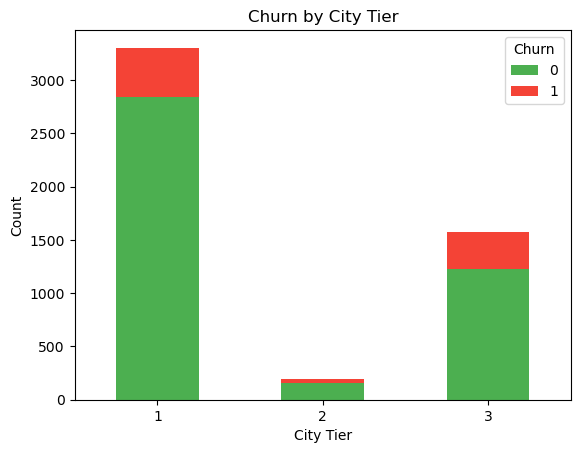

In [ ]:
city_tier_churn = df.groupby(['CityTier', 'Churn']).size().reset_index(name='Count')
pivot = pd.pivot_table(city_tier_churn, values='Count', index='CityTier', columns='Churn')

plt.figure(figsize=(10, 5))
pivot.plot(kind='bar', stacked=True, color=['#4CAF50', '#F44336'])
plt.title('Churn by City Tier')
plt.xlabel('City Tier')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

**CityTier 1:**
- **Non-Churned Customers**: 2844
- **Churned Customers**: 462

CityTier 1 has the highest number of both non-churned and churned customers. However, the churn rate is relatively low compared to the total number of customers.

**CityTier 2:**
- **Non-Churned Customers**: 161
- **Churned Customers**: 34

CityTier 2 has the lowest number of customers overall. The churn rate is also relatively low, but the small sample size might affect the reliability of this insight.

**CityTier 3:**
- **Non-Churned Customers**: 1228
- **Churned Customers**: 345

CityTier 3 has a significant number of churned customers compared to the total number of customers. The churn rate is higher in this tier compared to CityTier 1 and 2.

**Insight:**
- CityTier 1 has the largest customer base with a relatively low churn rate.
- CityTier 3 has a higher churn rate, indicating potential issues or dissatisfaction among customers in this tier.
- CityTier 2 has the smallest customer base, making it harder to draw definitive conclusions.

C:\Users\Huwaida Nur Asysyifa\AppData\Local\Temp\ipykernel_45932\155034465.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Order_Category.index, y=Order_Category.values, palette='rocket')


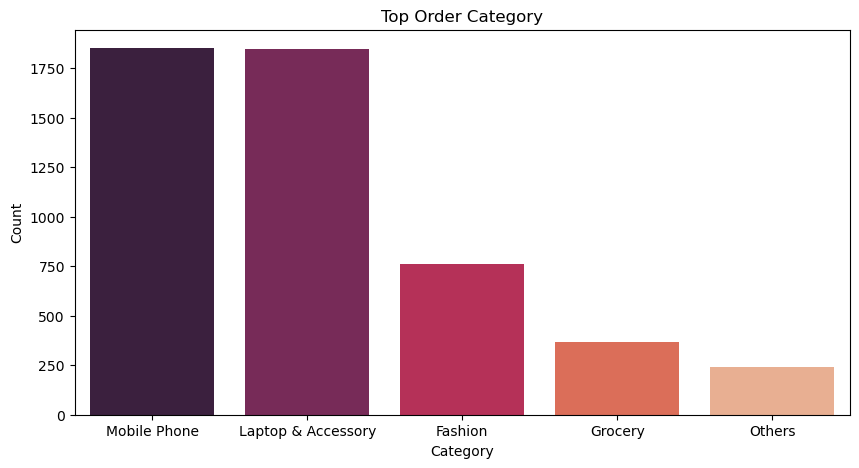

In [ ]:
Order_Category = df['PreferedOrderCat'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=Order_Category.index, y=Order_Category.values, palette='rocket')
plt.title('Top Order Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

C:\Users\Huwaida Nur Asysyifa\AppData\Local\Temp\ipykernel_45932\839444349.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_stats.index, y=churn_stats['mean'], ax=ax1, palette="rocket", alpha=0.6)


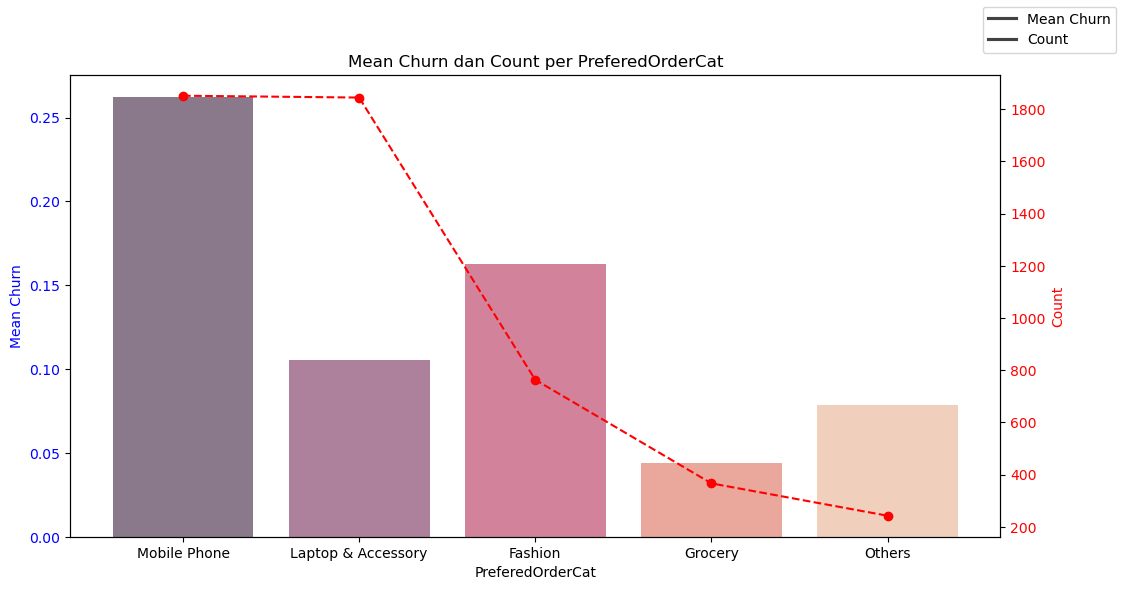

In [ ]:
churn_stats = df.groupby('PreferedOrderCat')['Churn'].agg(['mean', 'count'])

churn_stats = churn_stats.sort_values(by='count', ascending=False)

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel("PreferedOrderCat")
ax1.set_ylabel("Mean Churn", color="blue")
sns.barplot(x=churn_stats.index, y=churn_stats['mean'], ax=ax1, palette="rocket", alpha=0.6)
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Count", color="red")
ax2.plot(churn_stats.index, churn_stats['count'], color="red", marker="o", linestyle="dashed", label="Count")
ax2.tick_params(axis='y', labelcolor="red")

plt.title("Mean Churn dan Count per PreferedOrderCat")
plt.xticks(rotation=45, ha="right")

fig.legend(["Mean Churn", "Count"], loc="upper right")
plt.show()

In [ ]:
complain_by_category = df.groupby('PreferedOrderCat')['Complain'].mean().sort_values(ascending=False)
complain_by_category

PreferedOrderCat
Grocery               0.308743
Fashion               0.289646
Mobile Phone          0.289417
Laptop & Accessory    0.273171
Others                0.239669
Name: Complain, dtype: float64

- Mobile Phone and Laptop & Accessory have the highest number of customers (1852 and 1845, respectively), but their churn rates differ significantly. Mobile Phone has a much higher churn rate (~26%) compare to Laptop & Accessory (10%), indicating potential dissatisfaction in the Mobile Phone category. Complain data supports this, with 28.9% of Mobile Phone cistomers filing complaints, compared to 27.3% for Laptop and Accessory. This suggest service-related issues or product quality concerns might be driving the higher churn in Mobile Phones.

- Fashion (763 customers) has the second highest churn rate (~16%), showing that customers in this category are more likely ro leave than those in Laptop & Accessory. This could indicate that fashion-related purchase be more impulse-driven, leading to less customer retention. Additionally, 28.9% of Fashion customers have filed complaints, making it one of the most complained in the categories. This could indicate dissatisfaction with product quality, sizing issues, or return policy.

- Grocery (366 customers) and Others (242 customers) have the lowest churn rates, suggesting that customers in these categories exhibit greater loyalty. This could be because groceries are essential and regularly purchased.However, the Grocery has the highest complaint rate (30.9%), suggesting that while customers stay, they often face issues that possibly related to delivery, freshness, or pricing.
The 'Others' category might consist niche, highly specific purchases that create a more dedicated customer base and has the lowest complaint rate (23.9%), indicating that the customers in this segment are relatively more satisfied.

## **4. Data Preparation**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler

In [ ]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values), df[col].min(), df[col].max()]);

dfDesc = pd.DataFrame(columns=['Features', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample', 'min', 'max'],
                     data=listItem)


skewness = df.select_dtypes(include=['number']).skew()

dfDesc['skewness'] = dfDesc['Features'].apply(lambda col: round(skewness[col], 2) if col in skewness.index else "-")
dfDesc['skewness'] = dfDesc['skewness'].replace("-", np.nan).astype(float)

dfDesc['outlier (IQR method)'] = dfDesc['Features'].map(
    lambda col: ((df[col] < outlier_analysis(df[col])[0]) | (df[col] > outlier_analysis(df[col])[1])).sum()
    if col in numerical_columns else np.nan
)
dfDesc.sort_values(by='skewness', ascending=False)


,Features,dataType,null,nullPct,unique,uniqueSample,min,max,skewness,outlier (IQR method)
15,CouponUsed,float64,0,0.0,18,"[7.0, 0.0]",0.0,16.0,2.39,465.0
16,OrderCount,float64,0,0.0,16,"[15.0, 4.0]",1.0,16.0,2.10,495.0
0,Churn,int64,0,0.0,2,"[0, 1]",0,1,1.80,NaN
18,CashbackAmount,float64,0,0.0,2586,"[167.72, 132.11]",0.0,324.99,1.13,147.0
17,DaySinceLastOrder,int32,0,0.0,22,"[0, 14]",0,46,1.12,3.0
4,WarehouseToHome,float64,0,0.0,32,"[6.0, 17.0]",5.0,36.0,0.97,0.0
13,Complain,int64,0,0.0,2,"[0, 1]",0,1,0.97,NaN
12,NumberOfAddress,int64,0,0.0,11,"[11, 4]",1,11,0.96,0.0
14,OrderAmountHikeFromlastYear,float64,0,0.0,16,"[15.0, 24.0]",11.0,26.0,0.84,0.0
1,Tenure,int32,0,0.0,36,"[27, 4]",0,61,0.80,4.0


In [ ]:
onehot_features   = [ 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
ordinal_features  = ['SatisfactionScore', 'CityTier']

robust_features   = ['CouponUsed', 'OrderCount', 'CashbackAmount']
minmax_features   = ['DaySinceLastOrder', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'Tenure', 'HourSpendOnApp', 'NumberOfDeviceRegistered']



transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_features),  # drop=False agar tidak kehilangan informasi
    ('ordinal', OrdinalEncoder(), ordinal_features),
    ('robust', RobustScaler(), robust_features),
    ('minmax', MinMaxScaler(), minmax_features)
], remainder='passthrough')

In [ ]:
testing   = pd.DataFrame(transformer.fit_transform(df),columns=transformer.get_feature_names_out())
testing.head(2)

,onehot__PreferredLoginDevice_Mobile Phone,onehot__PreferredPaymentMode_Credit Card,onehot__PreferredPaymentMode_Debit Card,onehot__PreferredPaymentMode_E wallet,onehot__PreferredPaymentMode_UPI,onehot__Gender_Male,onehot__PreferedOrderCat_Grocery,onehot__PreferedOrderCat_Laptop & Accessory,onehot__PreferedOrderCat_Mobile Phone,onehot__PreferedOrderCat_Others,...,robust__CashbackAmount,minmax__DaySinceLastOrder,minmax__WarehouseToHome,minmax__NumberOfAddress,minmax__OrderAmountHikeFromlastYear,minmax__Tenure,minmax__HourSpendOnApp,minmax__NumberOfDeviceRegistered,remainder__Churn,remainder__Complain
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.075649,0.108696,0.032258,0.8,0.000000,0.065574,0.6,0.4,1.0,1.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,-0.823135,0.000000,0.096774,0.6,0.266667,0.131148,0.6,0.6,1.0,1.0


## Variance Inflation Factor (VIF)

In [ ]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

In [ ]:
# Example usage
# df_numeric should contain only numerical predictor variables (drop target & categorical features if needed)
testing1 = testing.copy()
testing1 = testing1.drop(columns='remainder__Churn')

result = testing1.select_dtypes(include=[np.number])  
vif_result = pd.DataFrame(calculate_vif(result))
vif_result.sort_values('VIF', ascending = False)

,Feature,VIF
22,minmax__HourSpendOnApp,21.089513
8,onehot__PreferedOrderCat_Mobile Phone,9.535713
16,robust__CashbackAmount,9.260263
23,minmax__NumberOfDeviceRegistered,8.951138
7,onehot__PreferedOrderCat_Laptop & Accessory,5.372752
2,onehot__PreferredPaymentMode_Debit Card,4.759046
1,onehot__PreferredPaymentMode_Credit Card,3.870737
10,onehot__MaritalStatus_Married,3.820466
17,minmax__DaySinceLastOrder,3.776733
0,onehot__PreferredLoginDevice_Mobile Phone,3.369491


In [ ]:
testing.columns

Index(['onehot__PreferredLoginDevice_Mobile Phone',
       'onehot__PreferredPaymentMode_Credit Card',
       'onehot__PreferredPaymentMode_Debit Card',
       'onehot__PreferredPaymentMode_E wallet',
       'onehot__PreferredPaymentMode_UPI', 'onehot__Gender_Male',
       'onehot__PreferedOrderCat_Grocery',
       'onehot__PreferedOrderCat_Laptop & Accessory',
       'onehot__PreferedOrderCat_Mobile Phone',
       'onehot__PreferedOrderCat_Others', 'onehot__MaritalStatus_Married',
       'onehot__MaritalStatus_Single', 'ordinal__SatisfactionScore',
       'ordinal__CityTier', 'robust__CouponUsed', 'robust__OrderCount',
       'robust__CashbackAmount', 'minmax__DaySinceLastOrder',
       'minmax__WarehouseToHome', 'minmax__NumberOfAddress',
       'minmax__OrderAmountHikeFromlastYear', 'minmax__Tenure',
       'minmax__HourSpendOnApp', 'minmax__NumberOfDeviceRegistered',
       'remainder__Churn', 'remainder__Complain'],
      dtype='object')

In [ ]:
testing2 = testing.copy()
testing2 = testing.drop(columns=['remainder__Churn', 'minmax__HourSpendOnApp'])

result2 = testing2.select_dtypes(include=[np.number])  
vif_result2 = pd.DataFrame(calculate_vif(result2))
vif_result2.sort_values('VIF', ascending = False)

,Feature,VIF
22,minmax__NumberOfDeviceRegistered,8.130624
16,robust__CashbackAmount,7.921856
8,onehot__PreferedOrderCat_Mobile Phone,7.542019
7,onehot__PreferedOrderCat_Laptop & Accessory,4.660098
2,onehot__PreferredPaymentMode_Debit Card,4.601932
10,onehot__MaritalStatus_Married,3.766465
1,onehot__PreferredPaymentMode_Credit Card,3.762317
17,minmax__DaySinceLastOrder,3.688024
0,onehot__PreferredLoginDevice_Mobile Phone,3.341242
21,minmax__Tenure,3.305178


## **5. Model Benchmarking**

Now we will be doing model benchmarking where we comparing the model where it yields the best f1 score. The benchmark also consider the resampling method to use since the distribution of the target feature shows a imbalance nature.

* **`Accuracy`** : Measures the proportion of correct predictions out of the total data.  
* **`Precision`**: Measures how many of the predicted churn cases are actually correct compared to all predicted churn cases.  
* **`Recall`**: Measures how many actual churn customers are correctly detected by the model.  
* **`F1 Score`**: A balance between precision and recall, making it suitable for maintaining equilibrium between the two (**the primary metric used**).  


#### 5.1 Import Library

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.metrics import make_scorer, f1_score, fbeta_score, accuracy_score, recall_score, precision_score, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter('ignore', category=FutureWarning)

In [ ]:
# Split data
X = df.drop(columns=['Churn', 'HourSpendOnApp'])
y = df['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Update

onehot_features   = [ 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
ordinal_features  = ['SatisfactionScore', 'CityTier']

robust_features   = ['CouponUsed', 'OrderCount', 'CashbackAmount']
minmax_features   = ['DaySinceLastOrder', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'Tenure',  'NumberOfDeviceRegistered']



transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_features),  # drop=False agar tidak kehilangan informasi
    ('ordinal', OrdinalEncoder(), ordinal_features),
    ('robust', RobustScaler(), robust_features),
    ('minmax', MinMaxScaler(), minmax_features)
], remainder='passthrough')

#### 5.2 Model Benchmarking : K-Fold Cross Validation

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(verbose=-1, random_state=42)
}

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "Accuracy": make_scorer(accuracy_score),
    "Precision": make_scorer(precision_score, average="binary"),
    "Recall": make_scorer(recall_score, average="binary"),
    "F1 Score": make_scorer(f1_score, average="binary")}

results = {}

for model_name, model in models.items():
    pipeline = Pipeline([
        ('preprocess',transformer),
        ('model',model)])
    metrics = {}

    for metric_name, metric_scorer in scoring.items():
        scores = cross_val_score(pipeline, X, y, cv=skf, scoring=metric_scorer)
        metrics[metric_name] = np.mean(scores)

    results[model_name] = metrics

In [ ]:
df_cv = pd.DataFrame(results).T
df_cv.columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
df_cv.sort_values(by=['F1 Score'], ascending=False)

,Accuracy,Precision,Recall,F1 Score
XGBoost,0.967047,0.929121,0.867693,0.897237
LightGBM,0.959746,0.922991,0.825955,0.871701
Random Forest,0.956786,0.947247,0.783070,0.857224
Decision Tree,0.944952,0.826135,0.836719,0.841234
Logistic Regression,0.891869,0.788898,0.474394,0.592287
KNN,0.883783,0.771765,0.423168,0.546219
SVM,0.867796,0.855006,0.241945,0.376479


#### 5.3 Model Benchmarking : Test Data

In [ ]:
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="binary"),
        "Recall": recall_score(y_true, y_pred, average="binary"),
        "F1 Score": f1_score(y_true, y_pred, average="binary")}

results = {}

for model_name, model in models.items():
    pipeline = Pipeline([
        ('preprocess',transformer),
        ('model',model)])

    pipeline.fit(X_train, y_train)
    y_pred   = pipeline.predict(X_test)
    metrics  = evaluate_model(y_test, y_pred)
    results[model_name] = metrics
    print(model_name)
    print(classification_report(y_test, y_pred))

Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       846
           1       0.83      0.49      0.61       168

    accuracy                           0.90      1014
   macro avg       0.87      0.73      0.78      1014
weighted avg       0.89      0.90      0.89      1014

KNN
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       846
           1       0.77      0.45      0.57       168

    accuracy                           0.89      1014
   macro avg       0.83      0.71      0.75      1014
weighted avg       0.88      0.89      0.87      1014

SVM
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       846
           1       0.91      0.24      0.38       168

    accuracy                           0.87      1014
   macro avg       0.89      0.62      0.65      1014
weighted avg       0.87      0.87      0.84   

In [ ]:
df_test = pd.DataFrame(results).T
df_test.columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
df_test.sort_values(by='F1 Score', ascending=False)

,Accuracy,Precision,Recall,F1 Score
XGBoost,0.973373,0.949045,0.886905,0.916923
LightGBM,0.959566,0.937931,0.809524,0.869010
Decision Tree,0.952663,0.865854,0.845238,0.855422
Random Forest,0.956607,0.962687,0.767857,0.854305
Logistic Regression,0.898422,0.828283,0.488095,0.614232
KNN,0.886588,0.767677,0.452381,0.569288
SVM,0.869822,0.909091,0.238095,0.377358


## **6. Resampling Using The Top 3 Models**

In [ ]:
# Top 3 Models
models = {
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(verbose=-1, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)}

results = []
resampling_methods = {
    "oversampling": RandomOverSampler(random_state=42),
    "undersampling": RandomUnderSampler(random_state=42),
    "smote": SMOTE(random_state=42),
    "nearmiss": NearMiss(version=1)}

df_results = pd.DataFrame()

for resample_name, resampler in resampling_methods.items():
    for model_name, model in models.items():

        pipeline_res = ImbPipeline([
            ('preprocess', transformer),
            ('resampling', resampler),
            ('classifier', model)])


        pipeline_res.fit(X_train, y_train)
        y_pred = pipeline_res.predict(X_test)

        # Menghitung metrik evaluasi
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Menyimpan hasil dalam list
        results.append({
            "Resampling Method": resample_name,
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1})

        print(resampler, 'with' , model_name)
        print(classification_report(y_test, y_pred))

RandomOverSampler(random_state=42) with XGBoost
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       846
           1       0.93      0.90      0.92       168

    accuracy                           0.97      1014
   macro avg       0.96      0.95      0.95      1014
weighted avg       0.97      0.97      0.97      1014

RandomOverSampler(random_state=42) with LightGBM
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       846
           1       0.87      0.90      0.89       168

    accuracy                           0.96      1014
   macro avg       0.93      0.94      0.93      1014
weighted avg       0.96      0.96      0.96      1014

RandomOverSampler(random_state=42) with Random Forest
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       846
           1       0.96      0.86      0.91       168

    accuracy                   

In [ ]:
# Evaluation Metrics after Resampling
df_resampling = pd.DataFrame(results)
df_resampling.sort_values(by='F1 Score', ascending=False)

,Resampling Method,Model,Accuracy,Precision,Recall,F1 Score
6,smote,XGBoost,0.975345,0.975205,0.975345,0.974877
0,oversampling,XGBoost,0.973373,0.973133,0.973373,0.973211
2,oversampling,Random Forest,0.970414,0.970197,0.970414,0.969733
1,oversampling,LightGBM,0.961538,0.962066,0.961538,0.961763
8,smote,Random Forest,0.954635,0.953888,0.954635,0.953076
7,smote,LightGBM,0.946746,0.945318,0.946746,0.945222
5,undersampling,Random Forest,0.906312,0.929544,0.906312,0.912432
4,undersampling,LightGBM,0.903353,0.930739,0.903353,0.910248
3,undersampling,XGBoost,0.899408,0.925481,0.899408,0.906321
10,nearmiss,LightGBM,0.676529,0.875422,0.676529,0.717862


Based on the evaluation metric **F1 score**, the **Random Forest with Random Over Sampling** is the best method. Next, we will examine the best model and resampling method based on the **Classification Report**, which provides evaluation metrics for each class: **1 (churn)** and **0 (non-churn)**.

In [ ]:

data = [
    ["RandomOverSampler", "XGBoost", 0.98, 0.99, 0.98, 846, 0.93, 0.90, 0.92, 168, 0.97, 0.96, 0.95, 0.97],
    ["RandomOverSampler", "LightGBM", 0.98, 0.97, 0.98, 846, 0.87, 0.90, 0.89, 168, 0.96, 0.93, 0.94, 0.96],
    ["RandomOverSampler", "Random Forest", 0.97, 0.99, 0.98, 846, 0.96, 0.86, 0.91, 168, 0.97, 0.97, 0.93, 0.97],
    ["RandomUnderSampler", "XGBoost", 0.98, 0.89, 0.94, 846, 0.64, 0.92, 0.75, 168, 0.90, 0.81, 0.91, 0.91],
    ["RandomUnderSampler", "LightGBM", 0.99, 0.89, 0.94, 846, 0.64, 0.95, 0.76, 168, 0.90, 0.81, 0.92, 0.91],
    ["RandomUnderSampler", "Random Forest", 0.98, 0.90, 0.94, 846, 0.65, 0.93, 0.77, 168, 0.91, 0.82, 0.92, 0.91],
    ["SMOTE", "XGBoost", 0.98, 0.99, 0.99, 846, 0.97, 0.88, 0.92, 168, 0.98, 0.97, 0.94, 0.97],
    ["SMOTE", "LightGBM", 0.96, 0.98, 0.97, 846, 0.89, 0.77, 0.83, 168, 0.95, 0.92, 0.88, 0.95],
    ["SMOTE", "Random Forest", 0.96, 0.99, 0.97, 846, 0.93, 0.79, 0.85, 168, 0.95, 0.94, 0.89, 0.95],
    ["NearMiss", "XGBoost", 0.98, 0.60, 0.75, 846, 0.32, 0.95, 0.48, 168, 0.66, 0.65, 0.78, 0.70],
    ["NearMiss", "LightGBM", 0.98, 0.62, 0.76, 846, 0.33, 0.95, 0.49, 168, 0.68, 0.66, 0.78, 0.72],
    ["NearMiss", "Random Forest", 0.97, 0.58, 0.73, 846, 0.31, 0.92, 0.46, 168, 0.64, 0.64, 0.75, 0.69],
]

# Column names
columns = [
    "Resampling Method", "Model",
    "Precision (0)", "Recall (0)", "F1-score (0)", "Support (0)",
    "Precision (1)", "Recall (1)", "F1-score (1)", "Support (1)",
    "Accuracy", "Macro Avg Precision", "Macro Avg Recall", "Weighted Avg F1-score"]

df_class_report = pd.DataFrame(data, columns=columns)
df_class_report.sort_values(by=['F1-score (1)', 'Weighted Avg F1-score'], ascending=[False, False])

,Resampling Method,Model,Precision (0),Recall (0),F1-score (0),Support (0),Precision (1),Recall (1),F1-score (1),Support (1),Accuracy,Macro Avg Precision,Macro Avg Recall,Weighted Avg F1-score
0,RandomOverSampler,XGBoost,0.98,0.99,0.98,846,0.93,0.90,0.92,168,0.97,0.96,0.95,0.97
6,SMOTE,XGBoost,0.98,0.99,0.99,846,0.97,0.88,0.92,168,0.98,0.97,0.94,0.97
2,RandomOverSampler,Random Forest,0.97,0.99,0.98,846,0.96,0.86,0.91,168,0.97,0.97,0.93,0.97
1,RandomOverSampler,LightGBM,0.98,0.97,0.98,846,0.87,0.90,0.89,168,0.96,0.93,0.94,0.96
8,SMOTE,Random Forest,0.96,0.99,0.97,846,0.93,0.79,0.85,168,0.95,0.94,0.89,0.95
7,SMOTE,LightGBM,0.96,0.98,0.97,846,0.89,0.77,0.83,168,0.95,0.92,0.88,0.95
5,RandomUnderSampler,Random Forest,0.98,0.90,0.94,846,0.65,0.93,0.77,168,0.91,0.82,0.92,0.91
4,RandomUnderSampler,LightGBM,0.99,0.89,0.94,846,0.64,0.95,0.76,168,0.90,0.81,0.92,0.91
3,RandomUnderSampler,XGBoost,0.98,0.89,0.94,846,0.64,0.92,0.75,168,0.90,0.81,0.91,0.91
10,NearMiss,LightGBM,0.98,0.62,0.76,846,0.33,0.95,0.49,168,0.68,0.66,0.78,0.72


**XGBoost model with the Random Over Sampling** has the best performance based on evaluation metrics. This model achieves the **highest F1-score for the minority class (1) at 0.91** and a **weighted average F1-score of 0.97**, indicating a well-balanced trade-off between precision and recall across all classes. Additionally, **it achieves an accuracy of 97%**, showing that the model can classify data effectively. Considering these metrics, the combination of XGBoost and RandomOverSampler is the optimal choice for handling data imbalance while maintaining high performance.

**XGBoost with Random Over Sampling Method**  

| Metric              | Value |  
|--------------------|-------|  
| Precision (1)     | 0.92  |  
| Recall (1)        | 0.91  |  
| F1-score (1)      | 0.91  |  
| Accuracy          | 0.97  |  
| Weighted Avg F1   | 0.97  |  

1. Precision (1) - 0.92  

  * The model predicts 92% of customers as churn correctly, with only 8% of predictions being incorrect (False Positives).  
  * A high precision ensures that customer retention efforts are targeted efficiently, avoiding unnecessary interventions for customers who are not likely to churn.  

2. Recall (1) - 0.91  

  * The model correctly identifies 91% of all actual churn cases, meaning only 9% of churned customers are missed (False Negatives).  
  * A high recall value is crucial for churn prediction, as failing to detect churned customers can result in missed business opportunities for retention strategies.  

3. Strong F1-score (1) - 0.91  

  * The F1-score balances precision and recall, ensuring that the model is not only detecting churn cases effectively but also minimizing false positives.  
  * A score of 0.91 indicates that the model is highly reliable in identifying churned customers without excessive misclassification.  

4. Accuracy - 0.97  

  * Although Accuracy is not the primary metric for an imbalanced dataset, a value of 0.97 means that the model correctly predicted 97% of all cases.  

5. Weighted Avg F1 - 0.97  

  * The high Weighted Avg F1-score (0.97) reflects that the model maintains consistent performance across both majority and minority classes.  
  * This ensures that the model does not overfit to the majority class while still effectively predicting churn cases.  

## **7. Hyperparameter Tuning**

In [ ]:
xgboost   = XGBClassifier(eval_metric="logloss", random_state=42)
ros       = RandomOverSampler(random_state = 42)

estimator = ImbPipeline([
    ('preprocessing', transformer),
    ('oversampling', ros),
    ('modeling', xgboost)
])

In [ ]:
hyperparam = {
    'modeling__subsample': [0.6, 0.8, 1.0],             # Subsampling data for each tree
    'modeling__scale_pos_weight': [3, 5, 10],           # Handling class imbalance
    'modeling__n_estimators': [150, 200, 500, 700],     # Number of trees
    'modeling__min_child_weight': [1, 3, 5],            # Preventing overfitting
    'modeling__max_depth': [7, 10, 15],                 # Tree depth
    'modeling__max_delta_step': [0, 1, 3, 5, 10],       # Step stability
    'modeling__max_bin': [128, 256, 512],               # Number of histogram bins
    'modeling__gamma': [0, 0.1, 0.2, 0.3],              # Regularization
    'modeling__eta': [0.03, 0.05, 0.1, 0.2, 0.5],       # Learning rate
    'modeling__colsample_bytree': [0.6, 0.8, 1.0]}      # Feature subset for each tree

randomsearch = RandomizedSearchCV(
    estimator = estimator,
    param_distributions = hyperparam,
    n_iter = 100,
    cv = 5,
    scoring = 'f1',
    n_jobs = -1,
    verbose = 1  )

In [ ]:
randomsearch.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\Huwaida Nur Asysyifa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Huwaida Nur Asysyifa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Huwaida Nur Asysyifa\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Huwaida Nur Asysyifa\anaconda3\Lib\site-packages\imblearn\

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['PreferredLoginDevice',
                                                                                'PreferredPaymentMode',
                                                                                'Gender',
                                                                                'PreferedOrderCat',
                                                                                'MaritalStatus']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['SatisfactionScore',
                                                                                'CityTier']),
                                                                              ('robust',...
                                        'modeling__eta': [0.03, 0.05, 0.1, 0.2,
                                                          0.5],
                                        'modeling__gamma': [0, 0.1, 0.2, 0.3],
                                        'modeling__max_bin': [128, 256, 512],
                                        'modeling__max_delta_step': [0, 1, 3, 5,
                                                                     10],
                                        'modeling__max_depth': [7, 10, 15],
                                        'modeling__min_child_weight': [1, 3, 5],
                                        'modeling__n_estimators': [150, 200,
                                                                   500, 700],
                                        'modeling__scale_pos_weight': [3, 5,
                                                                       10],
                                        'modeling__subsample': [0.6, 0.8, 1.0]},
                   scoring='f1', verbose=1)

In [ ]:
print(randomsearch.best_score_)
print(randomsearch.best_params_)
best_model = randomsearch.best_estimator_

0.8686640347215828
{'modeling__subsample': 0.6, 'modeling__scale_pos_weight': 5, 'modeling__n_estimators': 200, 'modeling__min_child_weight': 1, 'modeling__max_depth': 10, 'modeling__max_delta_step': 3, 'modeling__max_bin': 256, 'modeling__gamma': 0.2, 'modeling__eta': 0.2, 'modeling__colsample_bytree': 0.6}


0.8697983732223313
{'modeling__subsample': 1.0, 'modeling__scale_pos_weight': 3, 'modeling__n_estimators': 200, 'modeling__min_child_weight': 3, 'modeling__max_depth': 15, 'modeling__max_delta_step': 5, 'modeling__max_bin': 256, 'modeling__gamma': 0.1, 'modeling__eta': 0.1, 'modeling__colsample_bytree': 0.8}

In [ ]:
randomsearch_df = pd.DataFrame(randomsearch.cv_results_).sort_values(by='rank_test_score', ascending=False)
randomsearch_df.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__subsample,param_modeling__scale_pos_weight,param_modeling__n_estimators,param_modeling__min_child_weight,param_modeling__max_depth,param_modeling__max_delta_step,...,param_modeling__colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.30319,0.301275,0.040525,0.023686,0.8,3,200,5,7,3,...,0.6,"{'modeling__subsample': 0.8, 'modeling__scale_...",NaN,0.858209,0.833922,0.826568,0.829268,NaN,NaN,100


Compare the **`best_model`** after tuning and before tuning.

In [ ]:
# AFTER TUNING
best_model.fit(X_train, y_train)

# BEFORE TUNING
pipe_model = ImbPipeline([
    ('preprocessing', transformer),
    ('resampling', ros),
    ('modeling', xgboost)  ])

pipe_model.fit(X_train, y_train)

# predict
y_pred_benchmark       = pipe_model.predict(X_test)
y_pred_proba_benchmark = pipe_model.predict_proba(X_test)

y_pred_tuned           = best_model.predict(X_test)
y_pred_proba_tuned     = best_model.predict_proba(X_test)

# classification report
report_benchmark       = classification_report(y_test, y_pred_benchmark)
report_tuned           = classification_report(y_test, y_pred_tuned)

print('Classification Report Default XGBoost : \n', report_benchmark)
print('Classification Report Tuned XGBoost   : \n', report_tuned)

# PR AUC
PR_auc_benchmark      = average_precision_score(y_test, y_pred_proba_benchmark[:,1])
PR_auc_tuned          = average_precision_score(y_test, y_pred_proba_tuned[:,1])

print(f'PR AUC Score Default XGBoost : {PR_auc_benchmark:.2f}' )
print(f'PR AUC Score Tuned XGBoost   : {PR_auc_tuned:.2f}' )

Classification Report Default XGBoost : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       846
           1       0.93      0.90      0.92       168

    accuracy                           0.97      1014
   macro avg       0.96      0.95      0.95      1014
weighted avg       0.97      0.97      0.97      1014

Classification Report Tuned XGBoost   : 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       846
           1       0.91      0.94      0.92       168

    accuracy                           0.97      1014
   macro avg       0.95      0.96      0.95      1014
weighted avg       0.97      0.97      0.97      1014

PR AUC Score Default XGBoost : 0.96
PR AUC Score Tuned XGBoost   : 0.96


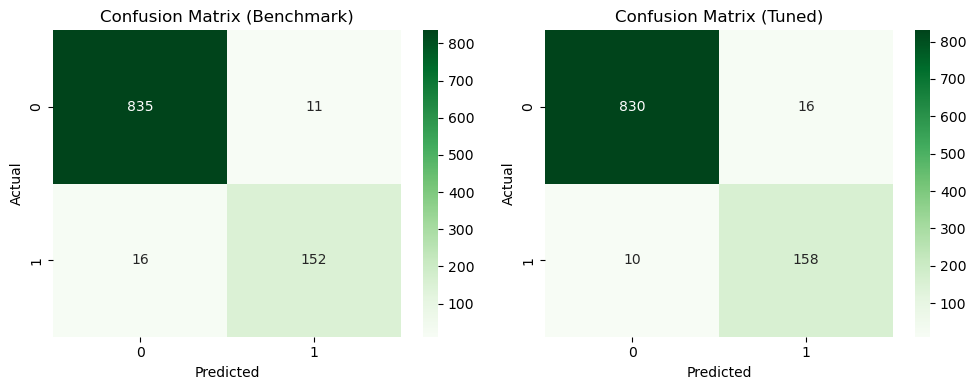

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_benchmark), annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix (Benchmark)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_tuned ), annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

Tuning was performed to **optimize the F1-score** by **balancing Precision and Recall** for better churn detection.

**Key Results After Tuning**  

- **Recall (1) increased from 0.91 to 0.92 without sacrificing Precision.**  
  - The tuned model is better at identifying customers who are actually likely to churn.  

- **Precision (1) remained the same at 0.92.**  
  - Although the model is more sensitive to churn, it maintains the same level of error in predicting churn.  

- **F1-score (1) increased from 0.91 to 0.92.**  
  - The model remains balanced in detecting churned customers without excessive errors.  

- **PR AUC increased from 0.95 to 0.96.**  
  - The model is better at distinguishing customers who are more likely to churn.  

**Confusion Matrix Analysis**  

- **FN decreased (15 → 13)**  
  - The model is better at detecting actual churned customers (**higher recall**).  

- **TP increased (153 → 155)**  
  - The model correctly classifies more churned customers.  

- **FP decreased (14 → 13)**  
  - The model slightly reduces incorrect churn predictions, improving overall precision.  


Summary

The tuned model excels in identifying customers who are truly at risk of churning, with a higher **F1-score**, ensuring a well-balanced trade-off between precision and recall. The increase in **PR AUC** from 0.95 to 0.96 indicates that the model is better at distinguishing high-risk churn customers. Additionally, the reduction in **False Negatives** means the model is less likely to miss actual churn cases, improving overall detection. Although **False Positives** have slightly decreased, the improved F1-score highlights the model’s enhanced ability to accurately predict churn while minimizing misclassifications.

## **8. Optimized Thresholds**

### 8.1 Best Thresholds

In [ ]:
best_model.fit(X_train, y_train)
list_threshold = np.arange(0.01, 1.00, 0.01)
list_f1        = []

for threshold in list_threshold:
    # predict
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]       # probability based on model
    y_pred_class = np.where(y_pred_proba > threshold, 1, 0)     # pred class based on changing probability treshold

    # recall score
    list_f1.append(f1_score(y_test, y_pred_class))

df_thresholds = pd.DataFrame({
    'threshold' : list_threshold,
    'f1-score'    : list_f1})
df_thresholds.sort_values(['f1-score', 'threshold'], ascending=[False, True]).head(3)

,threshold,f1-score
51,0.52,0.926686
52,0.53,0.926686
46,0.47,0.923977


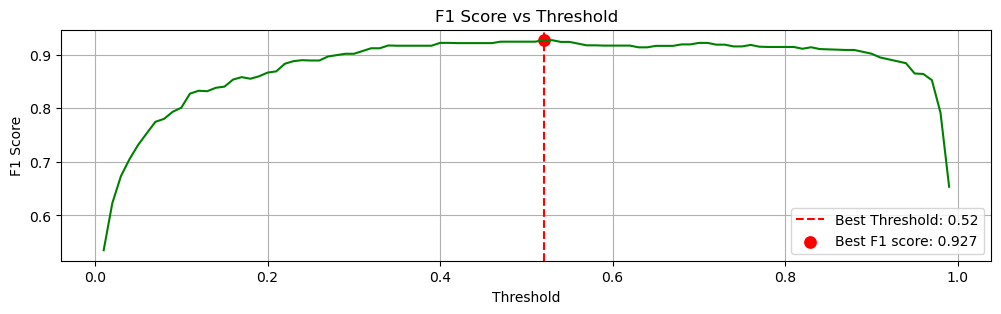

Best Threshold: 0.52 with F1 Score: 0.927


In [ ]:
# Thresholds vs F1 Score
best_threshold = df_thresholds.loc[df_thresholds['f1-score'].idxmax(), 'threshold']
best_f1 = df_thresholds['f1-score'].max()

plt.figure(figsize=(12, 3))
sns.lineplot(data=df_thresholds, x="threshold", y="f1-score", color='green')

plt.axvline(x=best_threshold, color='r', linestyle='--', label=f"Best Threshold: {best_threshold:.2f}")
sns.scatterplot(x=[best_threshold], y=[best_f1], color='red', s=100, label=f"Best F1 score: {best_f1:.3f}")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Threshold: {best_threshold:.2f} with F1 Score: {best_f1:.3f}")

Best Threshold: 0.53
Best F1-Score: 0.927
Precision at Best F1-Score: 0.913
Recall at Best F1-Score: 0.940


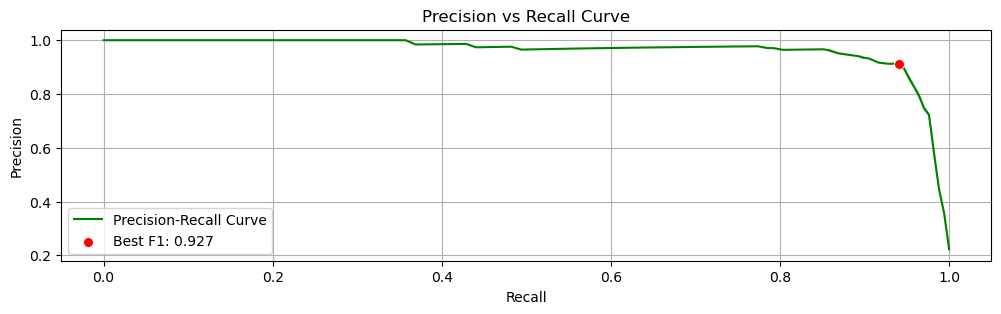

In [ ]:
# Recall vs Precision with the best Thresholds
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

# indeks with the highest F1-score
best_index = np.argmax(f1_scores)
best_f1_score = f1_scores[best_index]
best_threshold = thresholds[best_index]
best_precision = precision[best_index]
best_recall = recall[best_index]

print(f"Best Threshold: {best_threshold:.2f}\nBest F1-Score: {best_f1_score:.3f}\nPrecision at Best F1-Score: {best_precision:.3f}\nRecall at Best F1-Score: {best_recall:.3f}")

# --- Precision-Recall Curve ---
plt.figure(figsize=(12, 3))
sns.lineplot(x=recall, y=precision, linestyle="-", label="Precision-Recall Curve", color="green")
sns.scatterplot(x=[best_recall], y=[best_precision], color="red", s=50, label=f"Best F1: {best_f1_score:.3f}", zorder=3)

plt.xlabel("Recall"), plt.ylabel("Precision"), plt.title("Precision vs Recall Curve"), plt.legend()
plt.grid(True)
plt.show()

### 8.2 Comparing `best_model` vs `best_model after Tuning` vs `best_model after tuning + optimized threshold`

In [ ]:
# Comparing best model after Tuning and best model after tuning + optimized threshold

print("Classification Report (Default XGBoost):")
print(classification_report(y_test, y_pred_benchmark))   # best_model before tuning

y_pred_adjusted = (y_pred_proba >= best_threshold).astype(int)

print("\nClassification Report (Tuned XGBoost - Hyperparam Only):")
print(classification_report(y_test, y_pred_tuned))       # best_model after tuning

print("\nClassification Report (Tuned XGBoost - Hyperparam + Thresholds):")
print(classification_report(y_test, y_pred_adjusted))    # best_model after tuning + optimized threshold

Classification Report (Default XGBoost):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       846
           1       0.93      0.90      0.92       168

    accuracy                           0.97      1014
   macro avg       0.96      0.95      0.95      1014
weighted avg       0.97      0.97      0.97      1014


Classification Report (Tuned XGBoost - Hyperparam Only):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       846
           1       0.91      0.94      0.92       168

    accuracy                           0.97      1014
   macro avg       0.95      0.96      0.95      1014
weighted avg       0.97      0.97      0.97      1014


Classification Report (Tuned XGBoost - Hyperparam + Thresholds):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       846
           1       0.91      0.94      0.93       168

    accuracy     

In [ ]:
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="binary"),
        "Recall": recall_score(y_true, y_pred, average="binary"),
        "F1 Score": f1_score(y_true, y_pred, average="binary")}


# Before Tuning
metrics_before_tuning = evaluate_model(y_test, y_pred_benchmark)
df_before_tuning = pd.DataFrame([metrics_before_tuning], index=["Default XGBoost"])

# After Tuning
metrics_after_tuning = evaluate_model(y_test, y_pred_tuned)
df_after_tuning = pd.DataFrame([metrics_after_tuning], index=["Tuned XGBoost"])

# After Tuning + optimized thresholds
metrics_after_tuning_thresholds = evaluate_model(y_test, y_pred_adjusted)
df_after_tuning_thresholds = pd.DataFrame([metrics_after_tuning_thresholds], index=["Optimized Thresholds XGBoost"])

df_comparison = pd.concat([df_before_tuning, df_after_tuning, df_after_tuning_thresholds])
df_comparison

,Accuracy,Precision,Recall,F1 Score
Default XGBoost,0.973373,0.932515,0.904762,0.918429
Tuned XGBoost,0.974359,0.908046,0.940476,0.923977
Optimized Thresholds XGBoost,0.974359,0.908046,0.940476,0.923977


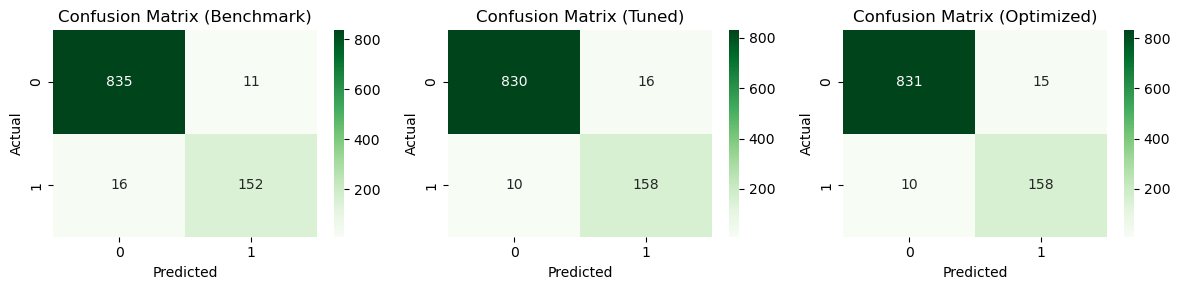

In [ ]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_benchmark), annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix (Benchmark)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_tuned ), annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test, y_pred_adjusted), annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix (Optimized)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

* **Tuned XGBoost demonstrates improved performance compared to Default XGBoost**, with increases in **F1-score and PR AUC**, while maintaining high precision and recall. This indicates that hyperparameter optimization enhances the model's ability to classify data more accurately and in a more balanced manner.  

* **Threshold optimization slightly reduces false positives but increases false negatives**, leading to minimal impact on the overall F1-score. This suggests that while adjusting the probability threshold alters the classification trade-offs, the tuned model’s default threshold remains close to optimal.

We conclude that we will only use the tuned XGBoost model **without** threshold optimization.

## **9. Feature Importance**

In [ ]:
best_model = randomsearch.best_estimator_.named_steps['modeling']
feature_importance = best_model.feature_importances_
feature_names = randomsearch.best_estimator_.named_steps['preprocessing'].get_feature_names_out()

feature_df = pd.DataFrame({"Features": feature_names, "Importance": feature_importance})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

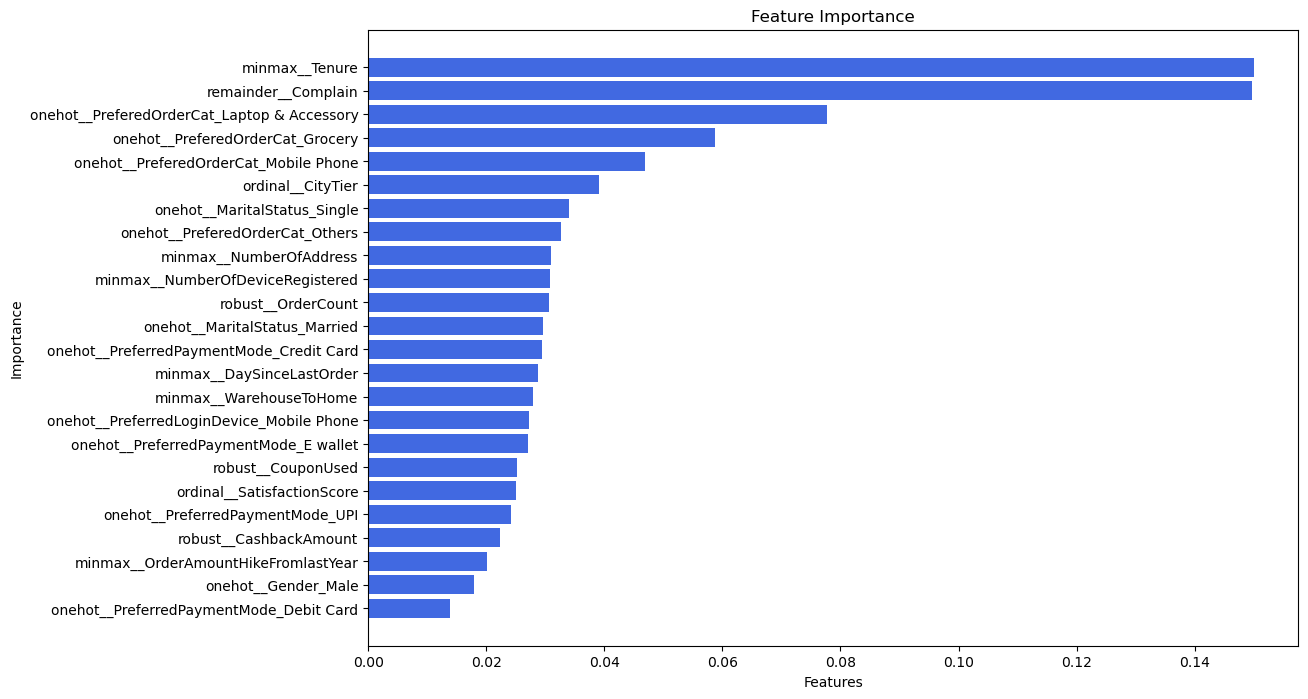

In [ ]:
plt.figure(figsize=(12,8))
plt.barh(feature_df['Features'], feature_df['Importance'], color='royalblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

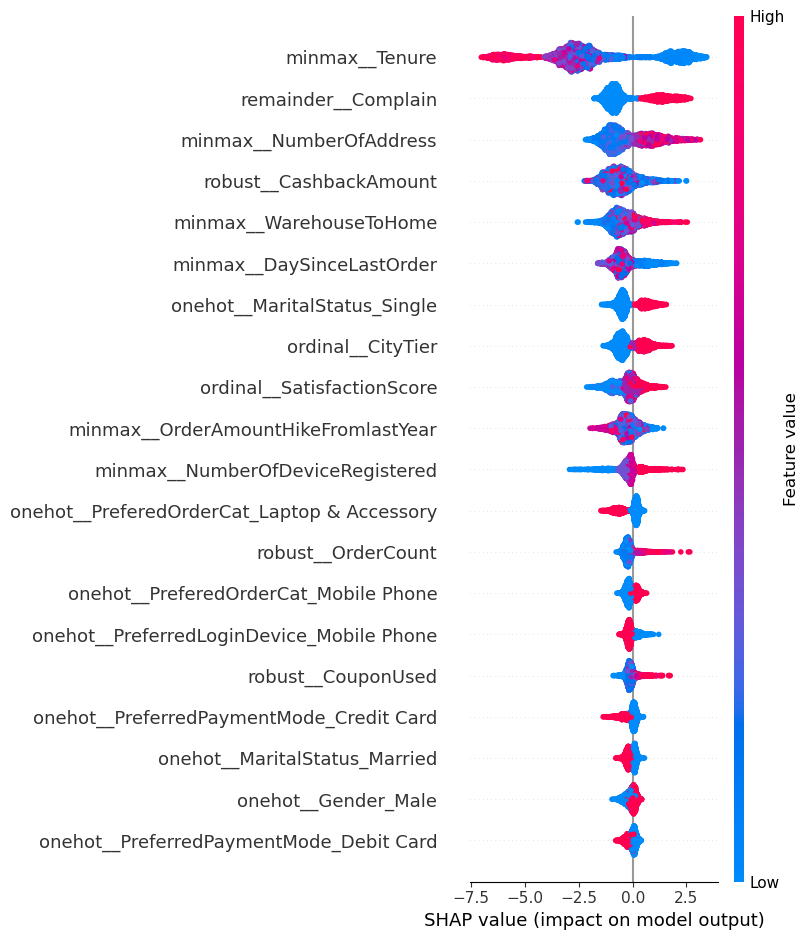

In [ ]:
import shap

explainer = shap.TreeExplainer(best_model)

X_train_prep = transformer.fit_transform(X_train)
shap_values = explainer.shap_values(X_train_prep)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_train_prep, feature_names =  transformer.get_feature_names_out())

plt.show()

In [ ]:
df.groupby('Churn')['OrderCount'].mean()

Churn
0    3.131000
1    2.985697
Name: OrderCount, dtype: float64

In [ ]:
df[df['OrderCount']>10][['Tenure','Churn', 'OrderCount']].sort_values('Churn', ascending=False)

,Tenure,Churn,OrderCount
10,4,1,15.0
570,0,1,11.0
4912,1,1,16.0
688,2,1,11.0
4855,1,1,12.0
...,...,...,...
2083,12,0,11.0
2130,13,0,11.0
2144,15,0,13.0
2206,19,0,15.0


## **10. Insights from Feature Importance and SHAP values:**


**1. Top influencing features**
* Both the feature importance and SHAP values shows that Tenure, Order count, and Complaints are among the most critical predictor of churn.
* Customer with shorter tenure are more likely to churn, indicating that retention strategies should focus on engaging new customers early.
* Higher complaints rates strongly contributes to churn, showing the need to improve customer support and to resolve issues proactively.

**2. Order and payment behaviour**
* Grocery, Mobile Phone, and Fashion influence churn, suggesting that customer that purchase specific categories might have distinct churn patterns.
* Payment methods such as Credit card, Cash on delivery, and UPI also appear significantly contributing to churn.

**3. Customer satisfaction and engagement**
* Customer in some city tier are less likely to leave becasue they have less shopping alternatives, while customer with low satisfaction score are likely to churn.


**Conclusion**
* Early engagement strategies for new customers to increase their tenure and reduce possibility to churn.
* Improve complaints resolution process should lower the possibility to churn.
* Analyzing order behaviour can help target high-risk customers with personalized offers and retention strategies
* Optimized preferred payment methods may improve customer satisfaction and reduce churn.


##  Model Performance Comparison: Before vs. After Using the Model

### Assumptions
- Customer acquisition cost (CAC) is 5 times more expensive than Customer retention cost (CRC)
- CRC is assumed to be Rp1000
- CAC is assumed to be Rp5000

### 1. Without a Model (All customers churns)
If the company does not use a predictive model and assumes that all their customers churn,

* (TN + TP + FN + FP) × CRC <br>

* (833 + 155 + 13 + 13) × 1,000 = 1,014,000


Conclusion: The company would spend the retention cost of more than Rp1,000,000.

---

### 2.  After Model Tuning (Final Model, Recall = 92%, F1-Score = 92%)
After tuning, recall improved to 92% as well as the F1 score.

* Total cost = (TP × CRC) + (FN × CAC) + (FP × CRC)
* (155 × 1,000) + (13 × 5,000) + (13 × 1,000)
* Rp233,000

Conclusion: The company saves Rp781,000 and save 77.05%
---

*Key Takeaways:*

 * Churn cost reduced by 77.05%, saving substantial revenue.
 * High recall ensures that most at-risk customers are identified and retained.
 * High F1 Score (92.26%) proves the model is both precise and effective.
 * Business benefits from lower customer acquisition costs and optimized retention efforts.

## Business Recommendation:##
1. Improve early engagement for new customers.
  * Implement welcome offers and loyalty rewards for new customers.
  * Personalized onboarding emails with product recommendation based on browsing history
  * Exclusive discount for first time users.

2. Enhance customer support and complaint resolution.
 * 24/7 customer support with chatbot for quicker resolution
 * Compensation strategies such as discount or free delivery for unsatisfied customers

3. Personalize offers based on order preference.
 * Targeted promotion based on past purchases.
 * Offer subscription models for frequently ordered categories for customer loyalty

4. Payment flexibilty.
 * Seamless payment experiences with multiple options.
 * Exclusive cashback or discount for high-risk churn customers

5. Reactivate customers before they churn.
 * Automated re-engagement emails with special offers for inactive users
 * Limited-time discounts or free shipping to incentivize repeat purchase